In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import ipywidgets as ipw
import hvplot.xarray # noqa
import hvplot.pandas # noqa
import holoviews as hv
import panel as pn
import pandas as pd
import panel.widgets as pnw
import xarray as xr
import folium
import missingno as msno
import colorcet as cc
from geopy.geocoders import Nominatim
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import holoviews.plotting.util as hv_plotting_util
from folium.plugins import MarkerCluster

> ***I chose to perform exploratory and explanatory Data Visualisation on the Netflix_Title.csv Dataset from Kaggle. This Dataset was created in Mid-2021, and therefore, we will not be using Information from the year 2021, since the Information is Imperfect in nature***

In [2]:
df = pd.read_csv('netflix_titles.csv',sep = ',') 
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**We capitalise all column names for improved readability**

In [3]:
df.columns = [col.title() for col in df.columns]
df.head(5)

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Exploration

**We begin by exploring the column information in the Data**

In [4]:
columns = df.columns
print(f'The columns in the DataFrame are; {[column for column in columns]}')

The columns in the DataFrame are; ['Show_Id', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date_Added', 'Release_Year', 'Rating', 'Duration', 'Listed_In', 'Description']


**Now, we explore each column to determine the Data Types of the Information stored in them, and their relevance to the Dataset**

In [5]:
dtypes = {}
for i in range(len(columns)):
    print(f'The Data Type of the Information in the {columns[i]} column is the {type(df[columns[i]][0])} Data Type')
    print("\n")

for column in df.columns:
    dtypes[column] = df[column].dtype

The Data Type of the Information in the Show_Id column is the <class 'str'> Data Type


The Data Type of the Information in the Type column is the <class 'str'> Data Type


The Data Type of the Information in the Title column is the <class 'str'> Data Type


The Data Type of the Information in the Director column is the <class 'str'> Data Type


The Data Type of the Information in the Cast column is the <class 'float'> Data Type


The Data Type of the Information in the Country column is the <class 'str'> Data Type


The Data Type of the Information in the Date_Added column is the <class 'str'> Data Type


The Data Type of the Information in the Release_Year column is the <class 'numpy.int64'> Data Type


The Data Type of the Information in the Rating column is the <class 'str'> Data Type


The Data Type of the Information in the Duration column is the <class 'str'> Data Type


The Data Type of the Information in the Listed_In column is the <class 'str'> Data Type


The Data Type of th

**Now that we have obtained the information pertaining to the data types in each column, we proceed to clean the Dataset**
<br>
<br>
**From our output above, we conclude that we do not need to change the Data Types of certain columns in order to facilitate the process**

> **First, we determine, if there are any, the number of missing values per column, in the DataFrame**

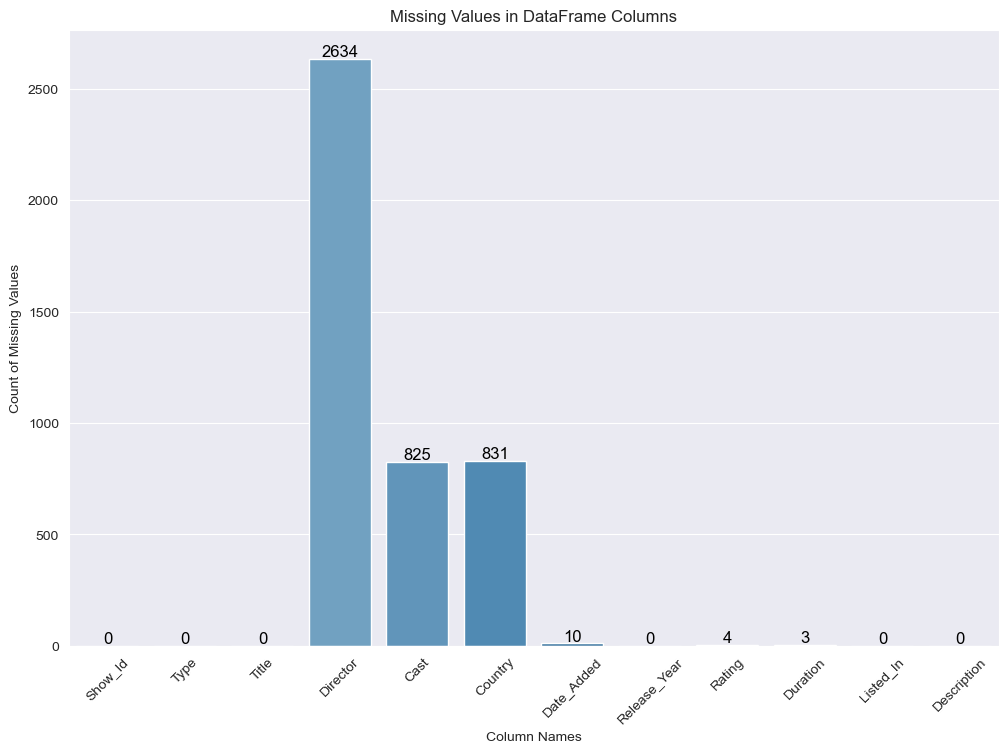

In [6]:
missing_values = df.isnull().sum()
sb.set_style("darkgrid")
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=missing_values.index, y = missing_values.values, palette="Blues_d")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45) # Improving readability
plt.title('Missing Values in DataFrame Columns')
plt.xlabel('Column Names')
plt.ylabel('Count of Missing Values')
plt.show()
showfliers = False

**It is clear that the bulk of the missing values, 2634 in total, belong to the 'director' column, while a smaller but still significant amount of values are missing from the 'cast' and 'coutry' columns, being 825 and 831 respectively**
<br>
<br>
**As for the other columns, 'date_added' is missing 10 values, while 'rating' and 'duration' are missing 4 and 3 values respectively**
<br>
<br>
**The other columns do not have any missing values**
<br>
<br>

### We clean our Dataset by replacing all Nan Values with placeholder values, so that we can access and manipulate them later

### It is not a good practice to simply remove all Nan values, since doing so might result in a skewed analysis of the Dataset

### Instead, we should prevent biased results and attempt to use our Domain Knowledge to fill-in-the-gaps, so to speak

In [7]:
df['Director'] = df['Director'].fillna('Missing')

df['Cast'] = df['Cast'].fillna('Missing')

df['Country'] = df['Country'].fillna('Missing')

df['Date_Added'] = df['Date_Added'].fillna('Missing')

df['Rating'] = df['Rating'].fillna('Missing')

df['Duration'] = df['Duration'].fillna('Missing')

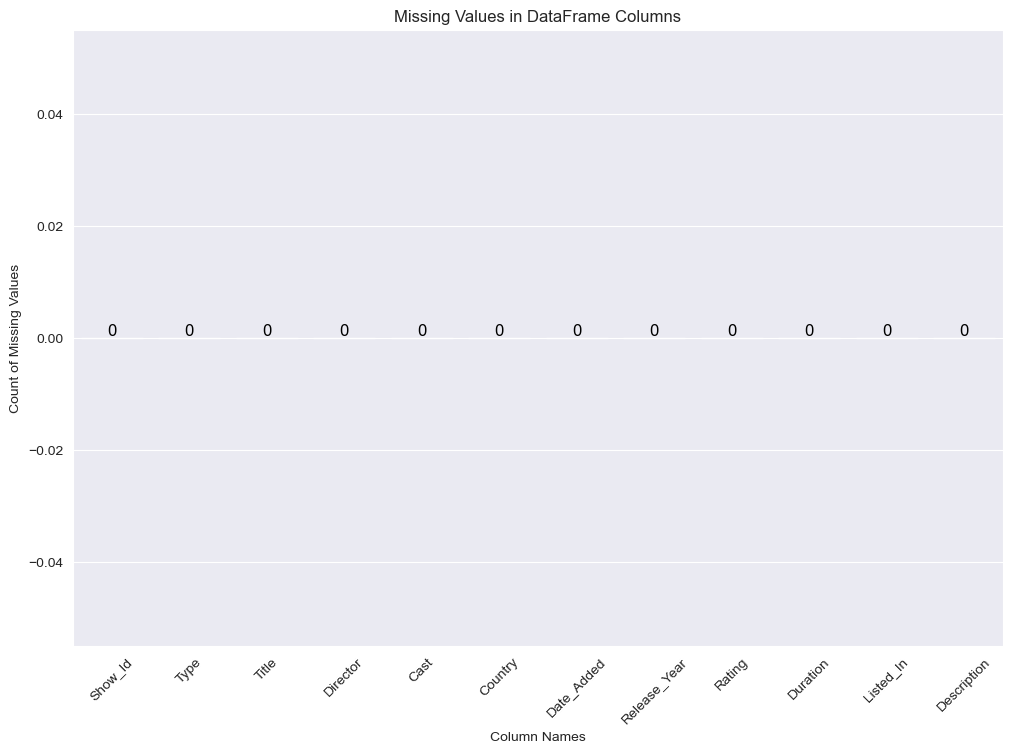

In [8]:
missing_values = df.isnull().sum()
sb.set_style("darkgrid")
plt.figure(figsize=(12, 8))
ax = sb.barplot(x=missing_values.index, y = missing_values.values, palette="Blues_d")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xticks(rotation=45) # Improving readability
plt.title('Missing Values in DataFrame Columns')
plt.xlabel('Column Names')
plt.ylabel('Count of Missing Values')
plt.show()
showfliers = False

> **Now that we have cleaned our DataFrame, we move on to the analysis and visualisation of the Data in the DataFrame**
<br>
>
> **We start by analysing the Types of Data in the DataFrame**
<br>

> Note : We will be implementing BOTH **Interactive** and **Static** Visualisations for this Project. 

In [9]:
type_counts = df['Type'].value_counts()
type_df = pd.DataFrame({'Count': type_counts})
type_df.reset_index(inplace=True)
type_df = type_df.rename(columns={'index': 'Type'})
type_df

,Type,Count
0,Movie,6131
1,TV Show,2676


In [10]:
colors = {'Movie': 'blue', 'TV Show': 'red'}
split_type = type_df.hvplot.bar(x = 'Type', y = 'Count', title = 'Population Breakdown of Types of Content on Netflix', width = 800, size = 400)
labels_split_type = hv.Labels(data = type_df, kdims = ['Type','Count'], vdims = 'Count')
split_type * labels_split_type

:Overlay
   .Bars.I   :Bars   [Type]   (Count)
   .Labels.I :Labels   [Type,Count]   (Count)

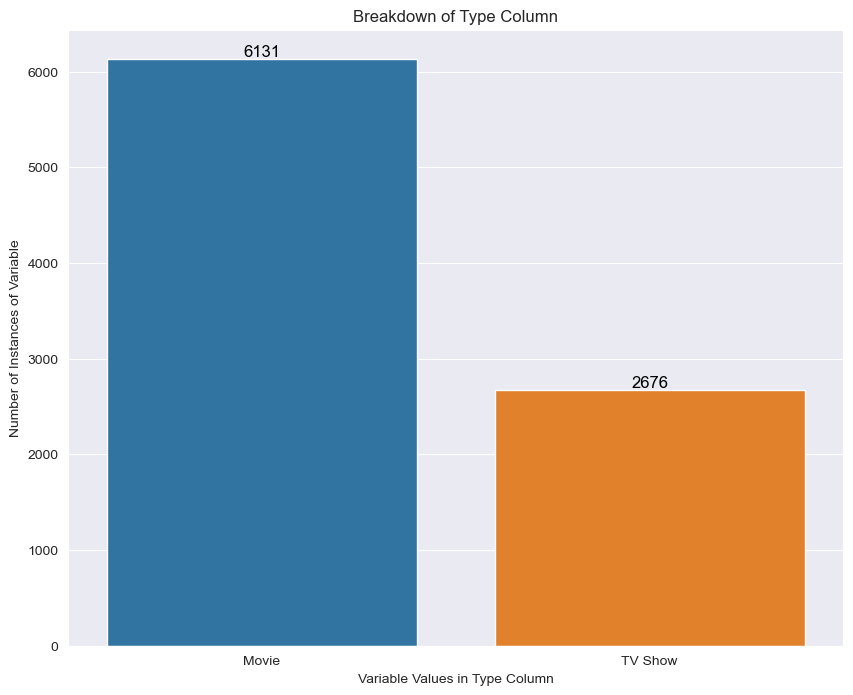

In [11]:
sb.set_style("darkgrid")
plt.figure(figsize=(10, 8))
ax = sb.barplot(data=type_df, x='Type', y='Count')
plt.xticks(rotation=0) # No need to rotate the integer, numeric values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Variable Values in Type Column")
plt.ylabel("Number of Instances of Variable")
plt.title("Breakdown of Type Column")
plt.show()

> Due to the significant difference in the number of Movies and TV Shows on Netflix, we cannot analyse the DataFrame directly, since the results obtained will, naturally, be more Movie-Centric
<br>
>
> Thus, we proceed to partition the Dataset into two distinct segments, Movies and TV Shows

In [12]:
movies = df[df['Type'] == 'Movie']
tv_shows = df[df['Type'] == 'TV Show']

In [13]:
movies.reset_index(inplace=True, drop = True)
movies.head(3)

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Missing,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Missing,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


## *Overall Analysis of Movies*

### Which Countries contribute the most Movies to Netflix?

In [14]:
countriess = []

c = list(movies['Country'])
for element in c:
    element=list(element.split(','))
    for j in element:
        countriess.append(j.replace(' ',""))
temp = Counter(countriess) # To find number of movies in each unqiue Genre
print(temp)

Counter({'UnitedStates': 2752, 'India': 962, 'UnitedKingdom': 534, 'Missing': 440, 'Canada': 319, 'France': 303, 'Germany': 182, 'Spain': 171, 'Japan': 119, 'China': 114, 'Mexico': 111, 'Egypt': 102, 'HongKong': 100, 'Nigeria': 94, 'Australia': 94, 'Indonesia': 86, 'Turkey': 83, 'Philippines': 80, 'Belgium': 78, 'Italy': 75, 'Argentina': 71, 'Brazil': 66, 'SouthKorea': 61, 'SouthAfrica': 51, 'Thailand': 46, 'Netherlands': 42, 'UnitedArabEmirates': 36, 'Denmark': 34, 'Poland': 32, 'Ireland': 32, 'Sweden': 31, 'NewZealand': 25, 'Lebanon': 24, 'Chile': 24, 'Norway': 21, 'Colombia': 20, 'Pakistan': 20, 'Israel': 19, 'Taiwan': 19, 'Switzerland': 18, 'Singapore': 18, 'Malaysia': 18, 'CzechRepublic': 16, 'Romania': 14, 'Uruguay': 13, 'Austria': 11, 'Russia': 11, 'Bulgaria': 10, 'Hungary': 10, 'Qatar': 10, 'Luxembourg': 10, 'Peru': 10, 'Greece': 9, 'SaudiArabia': 9, 'Iceland': 8, 'Vietnam': 7, 'Serbia': 7, 'Jordan': 7, 'Finland': 7, '': 6, 'Kenya': 6, 'Cambodia': 6, 'Portugal': 6, 'Morocco': 6

In [15]:
country_df = pd.DataFrame(temp.items(), columns=['Country', 'Count'])

country_df = country_df.sort_values(by = 'Count', ascending = False)

bar_plot_movies_country = country_df.hvplot.bar(x='Country', y='Count', title='Number of Movies by Country on Netflix', xlabel='Country', ylabel='Number of Movies', rot=45, height=400, width=4000,color='lightblue')

movies_country_labels = hv.Labels(data = country_df, kdims = ['Country','Count'], vdims = 'Count')

bar_plot_movies_country * movies_country_labels

:Overlay
   .Bars.I   :Bars   [Country]   (Count)
   .Labels.I :Labels   [Country,Count]   (Count)

### Thus, we can see that the United States is the Country that releases the most Movies on Netflix, at 2601 movies. The United States, therefore, takes up almost 20% of all Movie Content on Netflix

### If we had relevant Domain Knowledge, pertaining to the Missing Country Names, we would be able to provide a more clear and accurate analysis

### What is the distribution of Durations across all Movies?

In [16]:
dur = []

d = list(movies['Duration'])
for element in d:
    element=list(element.split(','))
    for j in element:
        dur.append(j.replace(' ',""))
temp = Counter(dur) # To find number of movies in each unqiue Genre
print(temp)

Counter({'90min': 152, '94min': 146, '97min': 146, '93min': 146, '91min': 144, '95min': 137, '96min': 130, '92min': 129, '102min': 122, '98min': 120, '99min': 118, '88min': 116, '101min': 116, '103min': 114, '106min': 111, '100min': 108, '89min': 106, '104min': 104, '86min': 103, '105min': 101, '87min': 101, '107min': 98, '110min': 97, '108min': 87, '116min': 80, '112min': 74, '85min': 73, '113min': 69, '109min': 69, '111min': 68, '84min': 67, '83min': 65, '118min': 65, '119min': 63, '81min': 62, '115min': 61, '117min': 61, '114min': 56, '120min': 56, '121min': 54, '124min': 52, '82min': 52, '127min': 48, '122min': 45, '78min': 45, '123min': 44, '126min': 44, '80min': 43, '133min': 42, '128min': 41, '130min': 40, '135min': 39, '137min': 38, '132min': 37, '125min': 36, '75min': 35, '79min': 35, '131min': 34, '72min': 33, '63min': 32, '129min': 32, '61min': 31, '76min': 31, '74min': 31, '77min': 30, '73min': 30, '60min': 29, '70min': 28, '69min': 28, '66min': 28, '71min': 28, '140min': 2

In [17]:
dur_df = pd.DataFrame(temp.items(), columns=['Duration', 'Count'])

dur_df['Duration'] = dur_df['Duration'].str.replace('min','')

dur_df = dur_df.sort_values(by = 'Count',ascending = False)

bar_plot_movies_dur = dur_df.hvplot.bar(x='Duration', y='Count', title='Number of Movies by Duration on Netflix', xlabel='Duration', ylabel='Number of Movies', rot=45, height=400, width=6000,color='lightblue')

movies_dur_labels = hv.Labels(data = dur_df, kdims = ['Duration','Count'], vdims = 'Count')

bar_plot_movies_dur * movies_dur_labels

:Overlay
   .Bars.I   :Bars   [Duration]   (Count)
   .Labels.I :Labels   [Duration,Count]   (Count)

### Thus, it is clear that the majority of the Movies on Netflix have a runtime of around 90 Minutes, with a range of + or - 10 minutes. 

### What is the distribution of Genres across all Movies? Which Genre is the most prominent in Netflix?

In [18]:
genres = []

g = list(movies['Listed_In'])
for element in g:
    element=list(element.split(','))
    for j in element:
        genres.append(j.replace(' ',""))
temp = Counter(genres) # To find number of movies in each unqiue Genre
print(temp)

Counter({'InternationalMovies': 2752, 'Dramas': 2427, 'Comedies': 1674, 'Documentaries': 869, 'Action&Adventure': 859, 'IndependentMovies': 756, 'Children&FamilyMovies': 641, 'RomanticMovies': 616, 'Thrillers': 577, 'Music&Musicals': 375, 'HorrorMovies': 357, 'Stand-UpComedy': 343, 'Sci-Fi&Fantasy': 243, 'SportsMovies': 219, 'ClassicMovies': 116, 'LGBTQMovies': 102, 'AnimeFeatures': 71, 'CultMovies': 71, 'Faith&Spirituality': 65, 'Movies': 57})


In [19]:
genr_df = pd.DataFrame(temp.items(), columns=['Genre', 'Count'])

genr_df = genr_df.sort_values(by = 'Count',ascending = False)

genre_movies = genr_df.hvplot.bar(x = 'Genre', y = 'Count', title = 'Number of Movies, by Genre, on Netflix', width = 2500, height = 400)
genre_labels = hv.Labels(data = genr_df, kdims = ['Genre','Count'], vdims = 'Count')

genre_movies * genre_labels

:Overlay
   .Bars.I   :Bars   [Genre]   (Count)
   .Labels.I :Labels   [Genre,Count]   (Count)

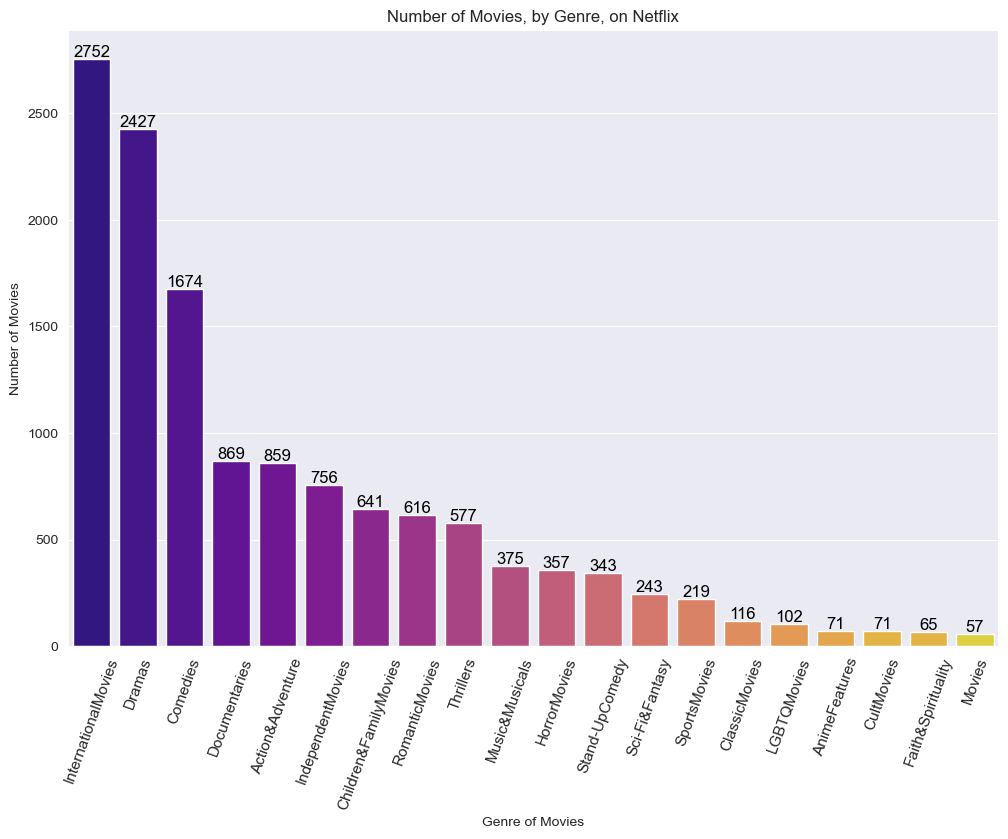

In [20]:
genr_df = pd.DataFrame(temp.items(), columns=['Genre', 'Count'])

genr_df = genr_df.sort_values(by = 'Count',ascending = False)

num_colors1 = len(genr_df[:17])
num_colors2 = len(genr_df[17:19])
num_colors3 = len(genr_df[19:20])
num_colors = 20

colors = sb.color_palette("plasma", n_colors= num_colors)
colors1 = colors[:17]
colors2 = colors[17:18]
colors3 = colors[19:20]

colors = colors1 + (colors2 * 2) + colors3

plt.figure(figsize=(12, 8))
ax = sb.barplot(data = genr_df,x = 'Genre',y = 'Count', palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Genre of Movies')
plt.ylabel('Number of Movies')
plt.title('Number of Movies, by Genre, on Netflix')

# Display the plot
plt.xticks(fontsize = 11, rotation=70) # Rotating labels to improve readability
plt.show()

In [21]:
total_count = genr_df['Count'].sum()
genr_df['Percentage of Content'] = (genr_df['Count'] / total_count) * 100
genr_df

,Genre,Count,Percentage of Content
4,InternationalMovies,2752,20.864291
2,Dramas,2427,18.400303
5,Comedies,1674,12.691433
0,Documentaries,869,6.588324
11,Action&Adventure,859,6.512509
3,IndependentMovies,756,5.731615
1,Children&FamilyMovies,641,4.859742
7,RomanticMovies,616,4.670205
6,Thrillers,577,4.374526
8,Music&Musicals,375,2.843063


### Thus, we can see that the Genre of Movie that is most prominent across Netflix is "International Movies", accounting for almost 21% of all of Netflix's Movie content

## What is the distribution of Age-Ratings for Movies on Netflix?

In [22]:
age_rates = []

a = list(movies['Rating'])
for element in a:
    element=list(element.split(','))
    for j in element:
        age_rates.append(j.replace(' ',""))
temp = Counter(age_rates) # To find number of movies in each unqiue Genre
print(temp)

Counter({'TV-MA': 2062, 'TV-14': 1427, 'R': 797, 'TV-PG': 540, 'PG-13': 490, 'PG': 287, 'TV-Y7': 139, 'TV-Y': 131, 'TV-G': 126, 'NR': 75, 'G': 41, 'TV-Y7-FV': 5, 'NC-17': 3, 'UR': 3, 'Missing': 2, '74min': 1, '84min': 1, '66min': 1})


In [23]:
movie_age = pd.DataFrame(temp.items(), columns=['Rating', 'Count'])

movie_age = movie_age[movie_age['Rating'] != 'Missing']

movie_age = movie_age.sort_values(by = 'Count',ascending = False)

bar_plot_movies_age = movie_age.hvplot.bar(x='Rating', y='Count', title='Number of Movies by Age Rating on Netflix', xlabel='Age Rating', ylabel='Number of Movies', rot=45, height=400, width=1000,color='lightblue')

movies_age_labels = hv.Labels(data = movie_age, kdims = ['Rating','Count'], vdims = 'Count')

bar_plot_movies_age * movies_age_labels

:Overlay
   .Bars.I   :Bars   [Rating]   (Count)
   .Labels.I :Labels   [Rating,Count]   (Count)

In [24]:
total_count = movie_age['Count'].sum()
movie_age['Percentage of Content'] = (movie_age['Count'] / total_count) * 100
movie_age

,Rating,Count,Percentage of Content
2,TV-MA,2062,33.643335
4,TV-14,1427,23.282754
6,R,797,13.003753
3,TV-PG,540,8.810573
0,PG-13,490,7.994779
1,PG,287,4.682656
8,TV-Y7,139,2.267907
5,TV-Y,131,2.137380
7,TV-G,126,2.055800
14,NR,75,1.223691


### Thus, it is clear that the Prominent Age Rating among Movies in Netflix is the 'TV-MA' Rating, which is held by 34% of all Movies on Netflix

### How recent are the release years for the Movies on Netflix?

In [25]:
release = []

r = list(movies['Release_Year'])
for element in r:
    release.append(element)
temp = Counter(release) # To find number of movies in each unqiue Genre
print(temp)

Counter({2017: 767, 2018: 767, 2016: 658, 2019: 633, 2020: 517, 2015: 398, 2021: 277, 2014: 264, 2013: 225, 2012: 173, 2010: 154, 2011: 145, 2009: 118, 2008: 113, 2006: 82, 2007: 74, 2005: 67, 2004: 55, 2003: 51, 2002: 44, 2001: 40, 1997: 34, 2000: 33, 1998: 32, 1999: 32, 1993: 24, 1995: 23, 1996: 21, 1994: 20, 1992: 20, 1990: 19, 1982: 17, 1991: 16, 1988: 16, 1989: 15, 1984: 12, 1981: 12, 1983: 11, 1986: 11, 1980: 11, 1979: 10, 1973: 10, 1985: 9, 1976: 9, 1987: 8, 1975: 7, 1978: 7, 1974: 6, 1977: 6, 1971: 5, 1972: 4, 1960: 4, 1967: 4, 1958: 3, 1962: 3, 1968: 3, 1945: 3, 1955: 3, 1944: 3, 1943: 3, 1964: 2, 1954: 2, 1956: 2, 1970: 2, 1969: 2, 1965: 2, 1942: 2, 1961: 1, 1959: 1, 1963: 1, 1966: 1, 1946: 1, 1947: 1})


In [26]:
release_timings = pd.DataFrame(temp.items(), columns=['Release_Year', 'Count'])

release_timings = release_timings.sort_values(by = 'Count',ascending = False)

bar_plot_movies_release = release_timings.hvplot.bar(x='Release_Year', y='Count', title='Number of Movies by Year of Release on Netflix', xlabel='Year', ylabel='Number of Movies', rot=45, height=400, width=1200,color='lightblue')

movies_release_labels = hv.Labels(data = release_timings, kdims = ['Release_Year','Count'], vdims = 'Count')

bar_plot_movies_release * movies_release_labels

:Overlay
   .Bars.I   :Bars   [Release_Year]   (Count)
   .Labels.I :Labels   [Release_Year,Count]   (Count)

In [27]:
total_count = release_timings['Count'].sum()
release_timings['Percentage of Content'] = (release_timings['Count'] / total_count) * 100
release_timings

,Release_Year,Count,Percentage of Content
8,2017,767,12.510194
24,2018,767,12.510194
34,2016,658,10.732344
25,2019,633,10.324580
0,2020,517,8.432556
...,...,...,...
58,1966,1,0.016311
38,1961,1,0.016311
67,1946,1,0.016311
53,1963,1,0.016311


### Thus, it is clear that more than 12.51% of all Movies on Netflix were released in the Year 2017, with 2018 being the next year on which the next-most number of Movies were released on Netflix, at the same proportion of more than 12.51%

## *Overall Analysis of TV Shows*

In [28]:
tv_shows.reset_index(inplace=True, drop = True)
tv_shows.head(3)

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description
0,s2,TV Show,Blood & Water,Missing,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s4,TV Show,Jailbirds New Orleans,Missing,Missing,Missing,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


### Which Countries contribute the most TV Shows to Netflix?

In [29]:
countriess = []

c = list(tv_shows['Country'])
for element in c:
    element=list(element.split(','))
    for j in element:
        countriess.append(j.replace(' ',""))
temp = Counter(countriess) # To find number of movies in each unqiue Genre
print(temp)

Counter({'UnitedStates': 938, 'Missing': 391, 'UnitedKingdom': 272, 'Japan': 199, 'SouthKorea': 170, 'Canada': 126, 'France': 90, 'India': 84, 'Taiwan': 70, 'Australia': 66, 'Spain': 61, 'Mexico': 58, 'China': 48, 'Germany': 44, 'Colombia': 32, 'Brazil': 31, 'Turkey': 30, 'Italy': 25, 'Thailand': 24, 'Singapore': 23, 'Argentina': 20, 'Russia': 16, 'Egypt': 15, 'Ireland': 14, 'Denmark': 14, 'Belgium': 12, 'SouthAfrica': 11, 'Israel': 11, 'Sweden': 11, 'Nigeria': 9, 'Poland': 9, 'Norway': 9, 'NewZealand': 8, 'Netherlands': 8, 'Malaysia': 8, 'Lebanon': 7, 'CzechRepublic': 6, 'Chile': 5, 'HongKong': 5, 'Finland': 4, 'Indonesia': 4, 'SaudiArabia': 4, 'Pakistan': 4, 'Iceland': 3, 'Philippines': 3, 'Kuwait': 3, 'Jordan': 2, 'Luxembourg': 2, 'WestGermany': 2, 'Greece': 2, 'Ukraine': 2, '': 1, 'UnitedArabEmirates': 1, 'Uruguay': 1, 'Senegal': 1, 'Belarus': 1, 'Malta': 1, 'PuertoRico': 1, 'Austria': 1, 'Cyprus': 1, 'Mauritius': 1, 'Croatia': 1, 'Syria': 1, 'Hungary': 1, 'Cuba': 1, 'Azerbaijan': 

In [30]:
country_df_tv = pd.DataFrame(temp.items(), columns=['Country', 'Count'])

country_df_tv = country_df_tv.sort_values(by = 'Count', ascending = False)

bar_plot_tv_country = country_df.hvplot.bar(x='Country', y='Count', title='Number of TV Shows by Country on Netflix', xlabel='Country', ylabel='Number of TV Shows', rot=45, height=400, width=4000,color='lightblue')

movies_tv_labels = hv.Labels(data = country_df, kdims = ['Country','Count'], vdims = 'Count')

bar_plot_tv_country * movies_tv_labels

:Overlay
   .Bars.I   :Bars   [Country]   (Count)
   .Labels.I :Labels   [Country,Count]   (Count)

### Thus, we can see that the United States is the Country that releases the most TV Shows on Netflix, at 938 TV Shows. The United States, therefore, takes up more than 30% of all Movie Content on Netflix

### If we had data on the Missing Country Names, we could provide a clearer and more accurate analysis

### What is the distribution of Durations across all TV Shows?

In [31]:
dur = []

d = list(tv_shows['Duration'])
for element in d:
    element=list(element.split(','))
    for j in element:
        dur.append(j.replace(' ',""))
temp = Counter(dur) # To find number of movies in each unqiue Genre

In [32]:
dur_df = pd.DataFrame(temp.items(), columns=['Duration', 'Count'])

dur_df['Duration'] = dur_df['Duration'].str.replace('min','')

dur_df = dur_df.sort_values(by = 'Count',ascending = False)

bar_plot_tv_dur = dur_df.hvplot.bar(x='Duration', y='Count', title='Number of TV Shows by Duration on Netflix', xlabel='Duration', ylabel='Number of TV Shows', rot=45, height=400, width=6000,color='lightblue')

tv_dur_labels = hv.Labels(data = dur_df, kdims = ['Duration','Count'], vdims = 'Count')

bar_plot_tv_dur * tv_dur_labels

:Overlay
   .Bars.I   :Bars   [Duration]   (Count)
   .Labels.I :Labels   [Duration,Count]   (Count)

### Thus, we can conclude that a majority of the TV Shows on Netflix, 1793 of them to be exact, have a duration of 1 Season

### What is the distribution of Genres across all TV Shows? Which Genre is the most prominent in Netflix?

In [33]:
genres = []

g = list(tv_shows['Listed_In'])
for element in g:
    element=list(element.split(','))
    for j in element:
        genres.append(j.replace(' ',""))
temp = Counter(genres) # To find number of movies in each unqiue Genre

> We choose a Bar Chart instead of a Stacked Bar Chart, for the following plot, since the spread of data is clearer for a Bar Chart, with respect to this particular dataset

In [34]:
genr_df = pd.DataFrame(temp.items(), columns=['Genre', 'Count'])

genr_df = genr_df.sort_values(by = 'Count',ascending = False)

genre_tv = genr_df.hvplot.bar(x = 'Genre', y = 'Count', title = 'Number of TV Shows, by Genre, on Netflix', width = 2500, height = 400)
genre_labels_tv = hv.Labels(data = genr_df, kdims = ['Genre','Count'], vdims = 'Count')

genre_tv * genre_labels_tv

:Overlay
   .Bars.I   :Bars   [Genre]   (Count)
   .Labels.I :Labels   [Genre,Count]   (Count)

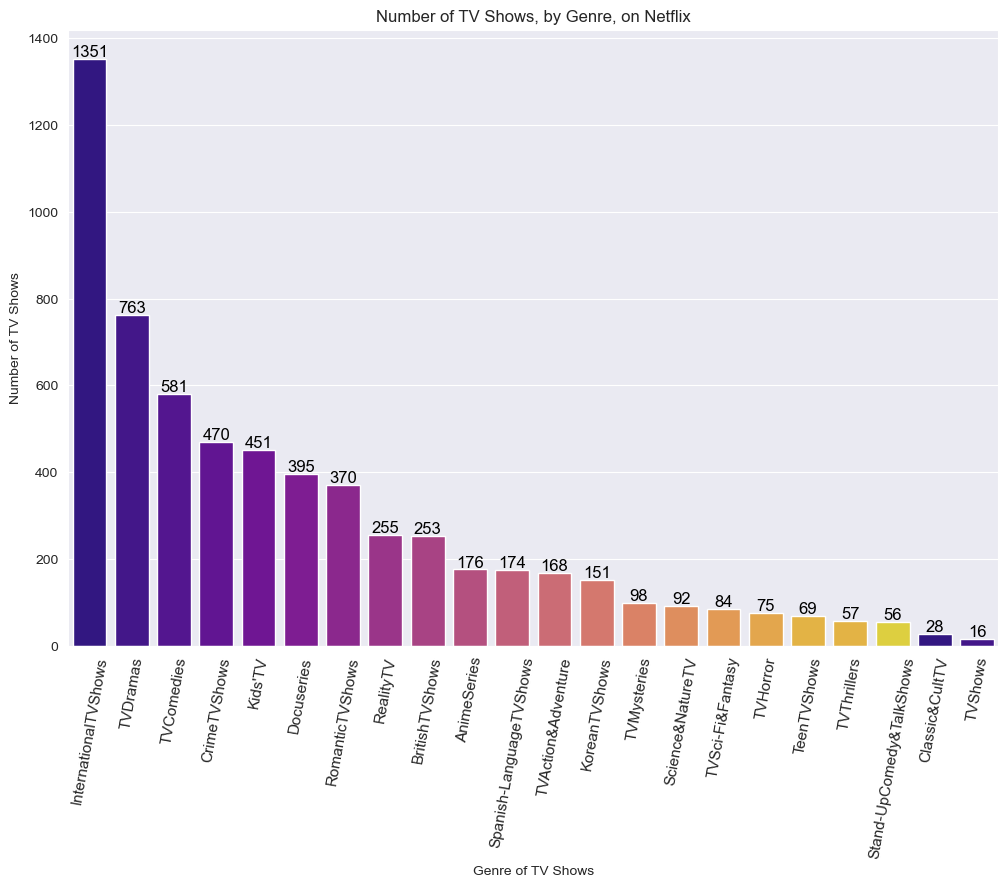

In [35]:
genr_df = pd.DataFrame(temp.items(), columns=['Genre', 'Count'])

genr_df = genr_df.sort_values(by = 'Count',ascending = False)

num_colors1 = len(genr_df[:17])
num_colors2 = len(genr_df[17:19])
num_colors3 = len(genr_df[19:20])
num_colors = 20

colors = sb.color_palette("plasma", n_colors= num_colors)
colors1 = colors[:17]
colors2 = colors[17:18]
colors3 = colors[19:20]

colors = colors1 + (colors2 * 2) + colors3

plt.figure(figsize=(12, 8))
ax = sb.barplot(data = genr_df,x = 'Genre',y = 'Count', palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Genre of TV Shows')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows, by Genre, on Netflix')

# Display the plot
plt.xticks(fontsize = 11, rotation=80) # Rotating labels to improve readability
plt.show()

In [36]:
total_count = genr_df['Count'].sum()
genr_df['Percentage of Content'] = (genr_df['Count'] / total_count) * 100
genr_df

,Genre,Count,Percentage of Content
0,InternationalTVShows,1351,22.028371
1,TVDramas,763,12.440894
8,TVComedies,581,9.473341
3,CrimeTVShows,470,7.663460
13,Kids'TV,451,7.353661
5,Docuseries,395,6.440567
7,RomanticTVShows,370,6.032937
6,RealityTV,255,4.157835
10,BritishTVShows,253,4.125224
15,AnimeSeries,176,2.869721


### Thus, we can see that the Genre of TV Shows that is most prominent across Netflix is "International TVShows", accounting for more than 22% of all of Netflix's TV Show content

## What is the distribution of Age-Ratings for TV Shows on Netflix?

In [37]:
age_rates = []

a = list(tv_shows['Rating'])
for element in a:
    element=list(element.split(','))
    for j in element:
        age_rates.append(j.replace(' ',""))
temp = Counter(age_rates) # To find number of movies in each unqiue Age-Rating
print(temp)

Counter({'TV-MA': 1145, 'TV-14': 733, 'TV-PG': 323, 'TV-Y7': 195, 'TV-Y': 176, 'TV-G': 94, 'NR': 5, 'R': 2, 'Missing': 2, 'TV-Y7-FV': 1})


In [38]:
tv_age = pd.DataFrame(temp.items(), columns=['Rating', 'Count'])

tv_age = tv_age[tv_age['Rating'] != 'Missing']

tv_age = tv_age.sort_values(by = 'Count',ascending = False)

bar_plot_tv_age = tv_age.hvplot.bar(x='Rating', y='Count', title='Number of TV Shows by Age Rating on Netflix', xlabel='Age Rating', ylabel='Number of TV Shows', rot=45, height=400, width=1000,color='lightblue')

tv_age_labels = hv.Labels(data = tv_age, kdims = ['Rating','Count'], vdims = 'Count')

bar_plot_tv_age * tv_age_labels

:Overlay
   .Bars.I   :Bars   [Rating]   (Count)
   .Labels.I :Labels   [Rating,Count]   (Count)

In [39]:
total_count = tv_age['Count'].sum()
tv_age['Percentage of Content'] = (tv_age['Count'] / total_count) * 100
tv_age

,Rating,Count,Percentage of Content
0,TV-MA,1145,42.819746
1,TV-14,733,27.412117
3,TV-PG,323,12.079282
2,TV-Y7,195,7.292446
4,TV-Y,176,6.581900
5,TV-G,94,3.515333
7,NR,5,0.186986
6,R,2,0.074794
9,TV-Y7-FV,1,0.037397


### Thus, it is clear that the Prominent Age Rating among TV Shows in Netflix is the 'TV-MA' Rating, which is held by more than a whopping 42% of all of Netflix's TV Shows, almost half of them!

### How old are the TV Shows on Netflix?

In [40]:
release = []

r = list(tv_shows['Release_Year'])
for element in r:
    release.append(element)
temp = Counter(release) # To find number of movies in each unqiue Genre
print(temp)

Counter({2020: 436, 2019: 397, 2018: 380, 2021: 315, 2017: 265, 2016: 244, 2015: 162, 2014: 88, 2012: 64, 2013: 63, 2011: 40, 2010: 40, 2009: 34, 2008: 23, 2007: 14, 2006: 14, 2005: 13, 2003: 10, 2004: 9, 2002: 7, 1999: 7, 2001: 5, 1993: 4, 1997: 4, 1998: 4, 2000: 4, 1992: 3, 1990: 3, 1996: 3, 1994: 2, 1986: 2, 1995: 2, 1988: 2, 1945: 1, 1925: 1, 1972: 1, 1974: 1, 1991: 1, 1977: 1, 1979: 1, 1981: 1, 1946: 1, 1985: 1, 1967: 1, 1989: 1, 1963: 1})


In [41]:
release_timings = pd.DataFrame(temp.items(), columns=['Release_Year', 'Count'])

release_timings = release_timings.sort_values(by = 'Count',ascending = False)

bar_plot_tv_release = release_timings.hvplot.bar(x='Release_Year', y='Count', title='Number of TV Shows by Year of Release on Netflix', xlabel='Year', ylabel='Number of TV Shows', rot=45, height=400, width=1200,color='lightblue')

tv_release_labels = hv.Labels(data = release_timings, kdims = ['Release_Year','Count'], vdims = 'Count')

bar_plot_tv_release * tv_release_labels

:Overlay
   .Bars.I   :Bars   [Release_Year]   (Count)
   .Labels.I :Labels   [Release_Year,Count]   (Count)

In [42]:
total_count = release_timings['Count'].sum()
release_timings['Percentage of Content'] = (release_timings['Count'] / total_count) * 100
release_timings

,Release_Year,Count,Percentage of Content
1,2020,436,16.292975
7,2019,397,14.835575
2,2018,380,14.200299
0,2021,315,11.771300
8,2017,265,9.902840
9,2016,244,9.118087
5,2015,162,6.053812
3,2014,88,3.288490
10,2012,64,2.391629
6,2013,63,2.354260


### Thus, it is clear that a large majority of the TV Shows on Netflix were released fairly recently, with the most number of TV Shows, which take up more than 16% of all TV Shows, being Shows which were released during the year 2020

Now that we have completed our Preliminary Analysis, we move on to our focused Analysis

**We will be 'removing' the Missing values when doing our Analysis from here on out**

> First, we determine the distribution of movies with respect to the year and month in which they were added
<br>
>> In order to accomplish this, we must reformat the 'date_added' column

**We decide to create a heatmap to determine the distribution of movies with respect to the month in which they were added**
<br>
<br>
**We subset the data to movies released from the year 1985 onwards, so that the data we analyse is sufficiently dense to enable effective analysis**

/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/2195735701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Date_Added'] = pd.to_datetime(movies['Date_Added'], errors='coerce')  # 'coerce' will convert invalid values to NaT (Not-a-Time)
/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/2195735701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['Month'] = movies['Date_Added'].dt.strftime('%B')  # Getting the full month name


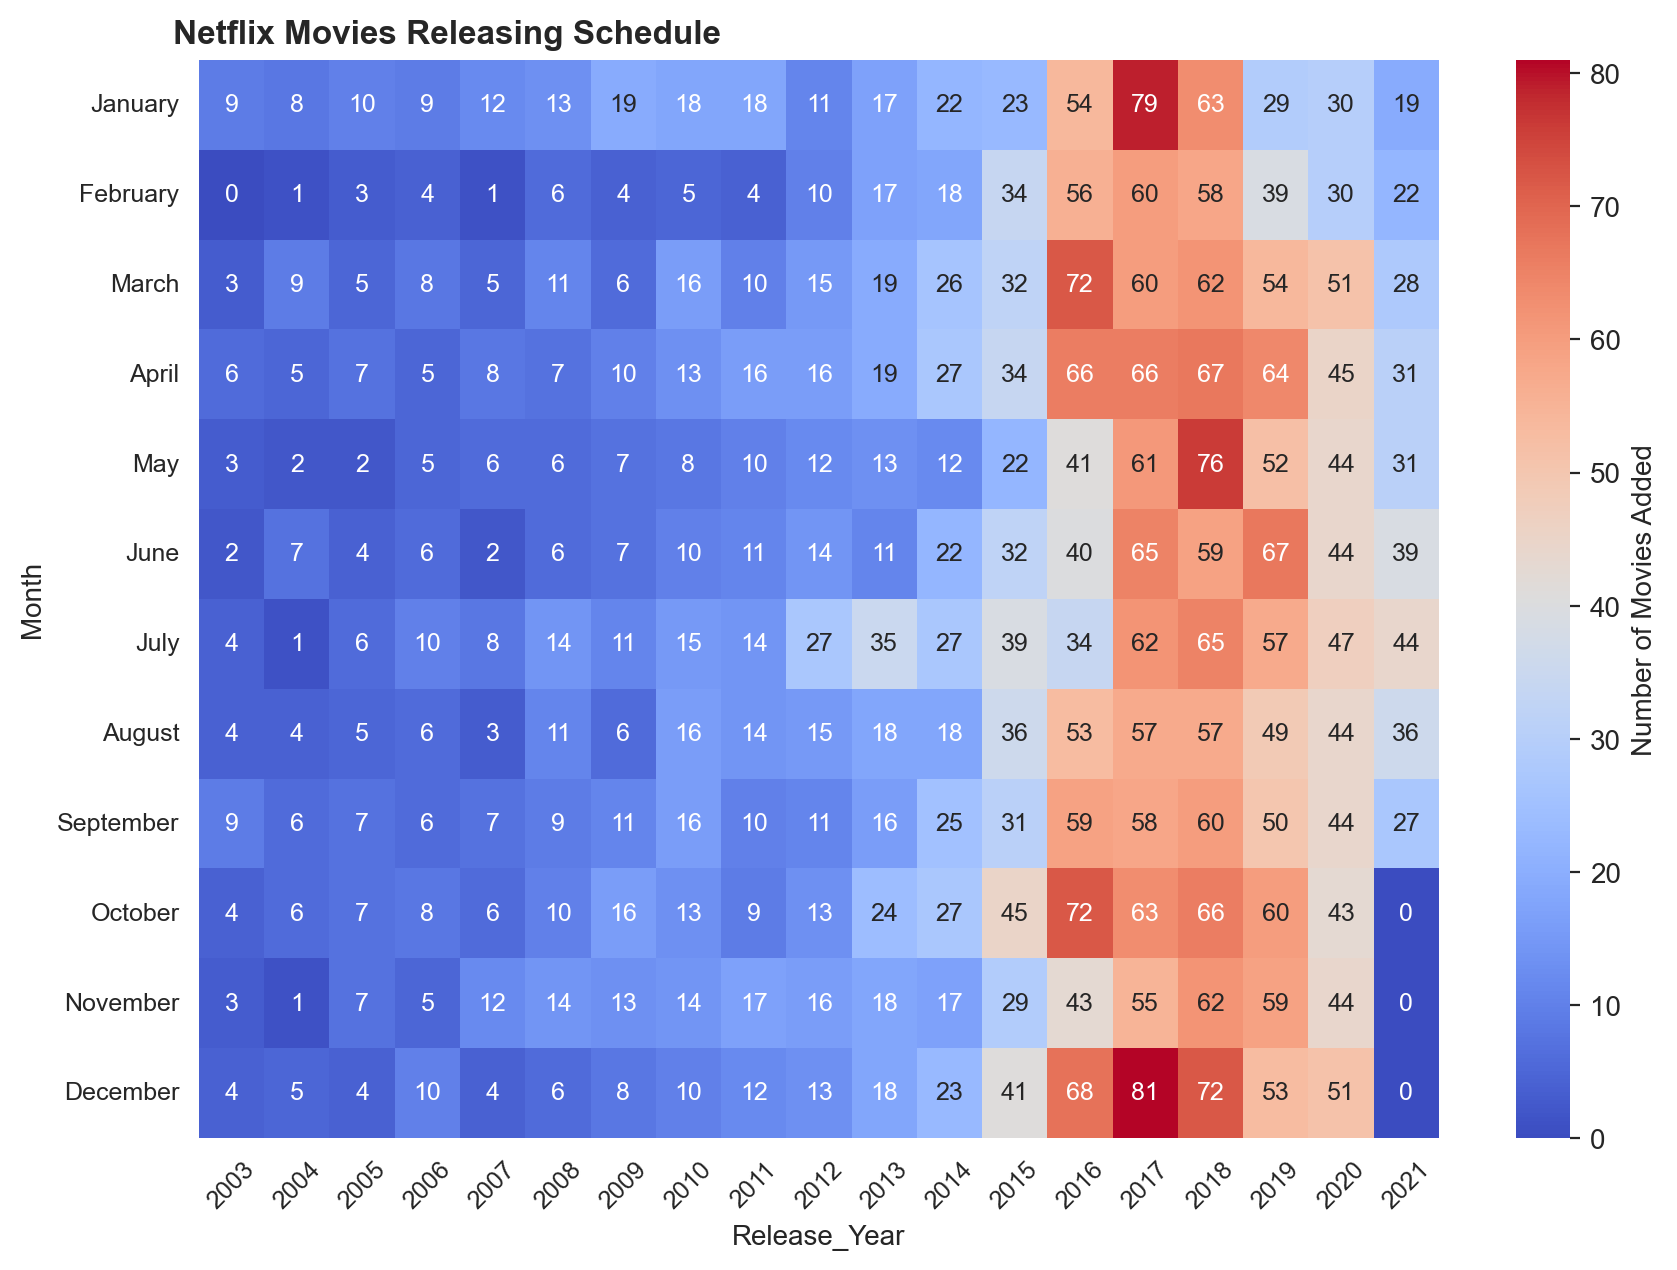

In [43]:
movies['Date_Added'] = pd.to_datetime(movies['Date_Added'], errors='coerce')  # 'coerce' will convert invalid values to NaT (Not-a-Time)

movies['Month'] = movies['Date_Added'].dt.strftime('%B')  # Getting the full month name

movies = movies[movies['Release_Year'] >= 1985] # To reduce density of data and improve applicability of insights

heatmap_data = movies.pivot_table(index='Month', columns='Release_Year', values='Type', aggfunc='count', fill_value=0)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data.reindex(month_order)

# Data Subsetting process below


column_sums = heatmap_data.sum() # Finding total number of movies released 
count_data = pd.DataFrame({'Number of Movies Released': column_sums}) # Renaming for improved readability
count_data.reset_index(inplace = True) # Converting Series to DataFrame
count_data = count_data.rename(columns = {'Release_Year' : 'Year Movie Was Released'}) # Renaming for improved readability
condition_to_remove = count_data['Number of Movies Released'] < 50 # To reduce density of data and improve insights
to_remove = count_data[condition_to_remove].index # Collating relevant indexes
count_data = count_data.drop(to_remove) # Dropping rows
count_data.reset_index(drop = True,inplace = True) # Resetting index for easier access

count_data['Year Movie Was Released']

heatmap_data = heatmap_data[count_data['Year Movie Was Released']]

plt.figure(figsize=(10, 7), dpi=200)
sb.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', cbar=True, cbar_kws={'label': 'Number of Movies Added'}, annot_kws={"size": 9})
plt.title('Netflix Movies Releasing Schedule', fontweight='bold', position=(0.20, 1.0 + 0.02), horizontalalignment = 'center')
plt.xticks(fontsize=9, rotation=45) # We rotate the labels to improve readability
plt.yticks(fontsize=9)
plt.show()

### There are a few observations and insights which can be gleaned from the heatmap generated above
> Firstly, it is clear that there is a **general increasing trend** in the number of movies released, with respect to the years
<br>
>
> Netflix started to become more popular as a Online Streaming Service from the year 2014, as can be seen by a consistent change in the shade of the heatmap, indicating a larger number of movies being uploaded onto Netflix as compared to previous years. We will not be considering the year 2021 in our analysis, since it is clear that the dataset **does not provide perfect information** with repsect to the movies released, per month, in the year 2021. We will address this issue by subsetting the DataFrame further and generating another HeatMap below
<br>
>
>> Specifically, it can be seen that with the exception of the month of January, there was at least a **20% increase** in the number of movies released on Netflix for **each month**, from the **year 2014 to the year 2015**, and the total number of movies released increaed by a whopping **50% from 2014 to 2015**
<br>
>>
>> This trend continues into **2016**, with the **total number of movies released on Netflix increasing by 65%****, compared to 2015. This is the greatest increase in the range of years shown
<br>
<br>
>>
> Furthermore, it can be seen that, over the years, the months of **November, December, January, March and April have had a steadily increasing general trend**, with respect to the number of movies released
<br>


**Now, we generate another HeatMap with the further subsetted Data**

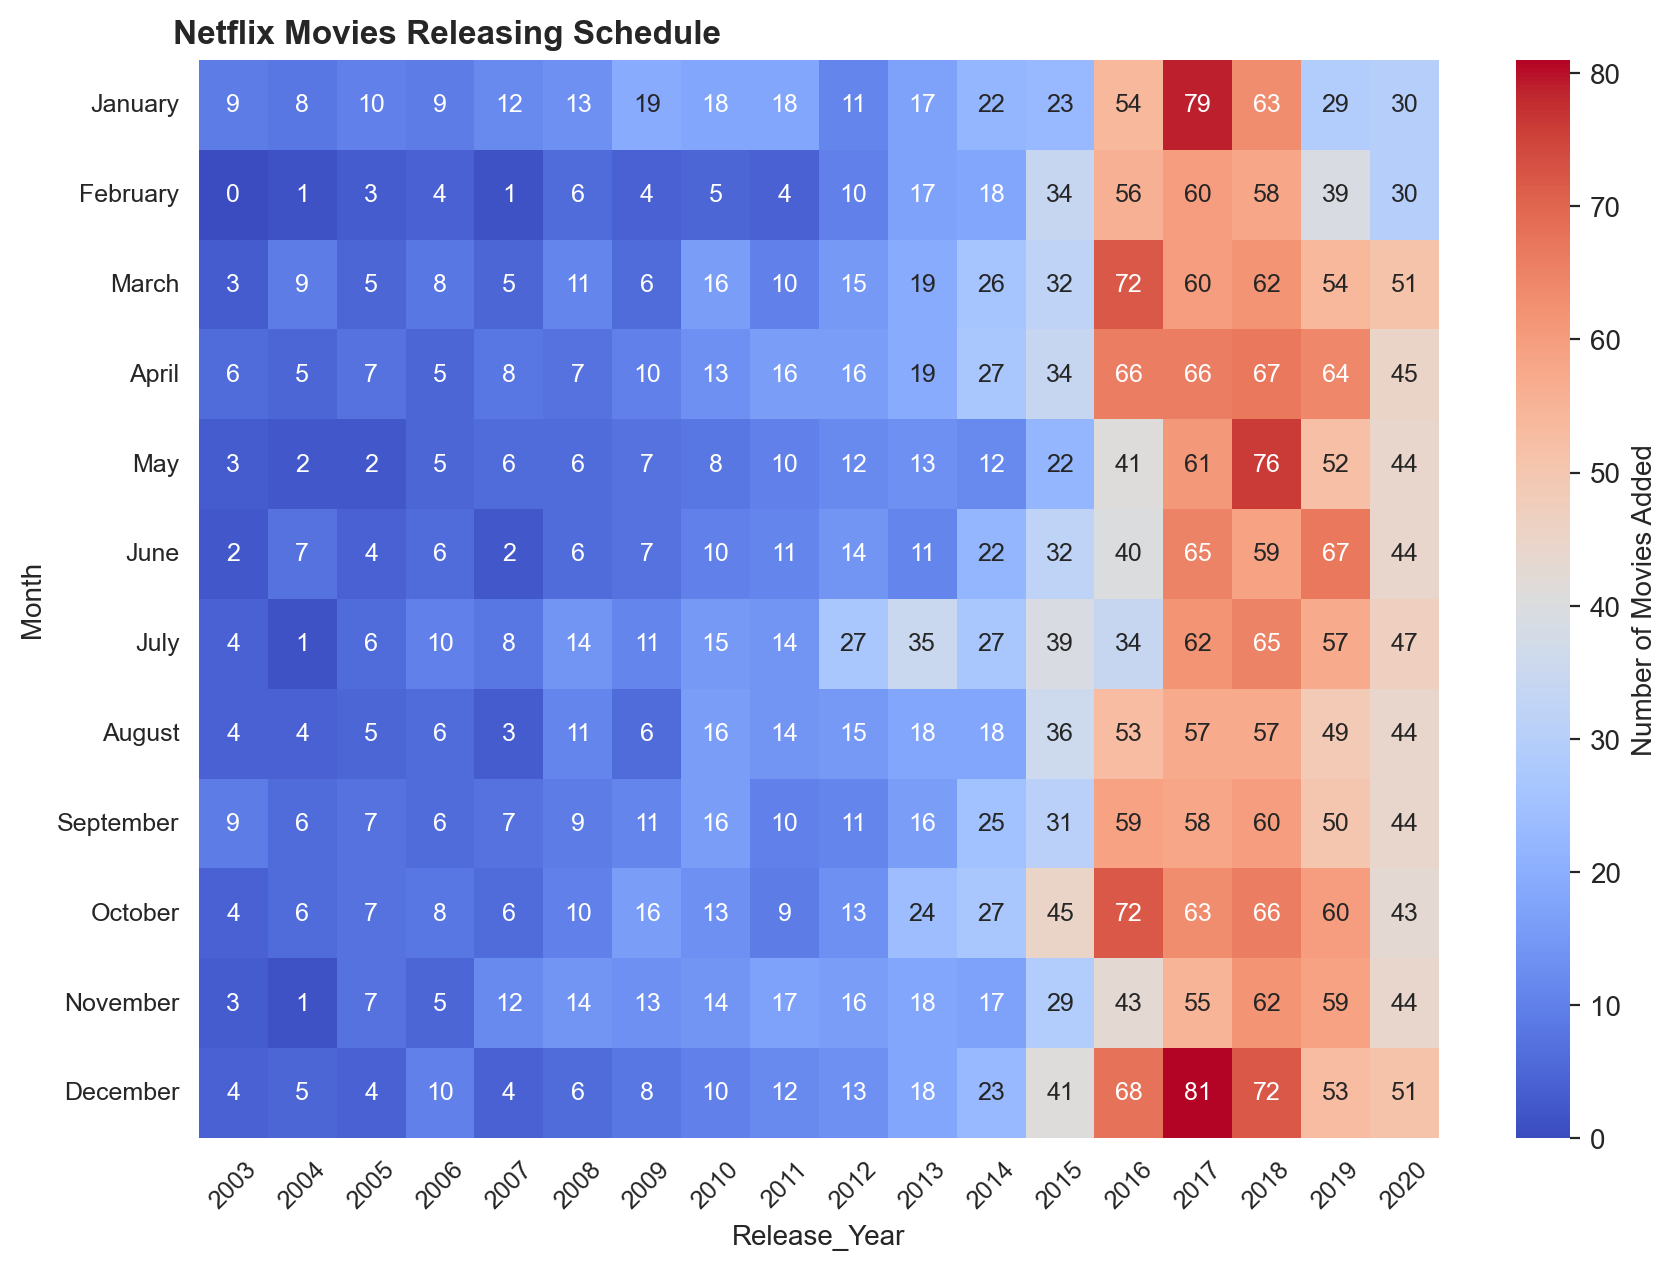

In [44]:
movies['Date_Added'] = pd.to_datetime(movies['Date_Added'], errors='coerce')  # 'coerce' will convert invalid values to NaT (Not-a-Time)

movies['Month'] = movies['Date_Added'].dt.strftime('%B')  # Getting the full month name

movies = movies[(movies['Release_Year'] >= 1985) & (movies['Release_Year'] < 2021)] # TO reduce density of data and improve applicability of insights

heatmap_data_subset = movies.pivot_table(index='Month', columns='Release_Year', values='Type', aggfunc='count', fill_value=0)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data_subset = heatmap_data_subset.reindex(month_order)

# Data Subsetting process below


column_sums = heatmap_data_subset.sum() # Finding total number of movies released 
count_data = pd.DataFrame({'Number of Movies Released': column_sums}) # Renaming for improved readability
count_data.reset_index(inplace = True) # Converting Series to DataFrame
count_data = count_data.rename(columns = {'Release_Year' : 'Year Movie Was Released'}) # Renaming for improved readability
condition_to_remove = count_data['Number of Movies Released'] < 50 # To reduce density of data and improve insights
to_remove = count_data[condition_to_remove].index # Collating relevant indexes
count_data = count_data.drop(to_remove) # Dropping rows
count_data.reset_index(drop = True,inplace = True) # Resetting index for easier access

count_data['Year Movie Was Released']

heatmap_data_subset = heatmap_data_subset[count_data['Year Movie Was Released']]

plt.figure(figsize=(10, 7), dpi=200)
sb.heatmap(heatmap_data_subset, cmap='coolwarm', annot=True, fmt='d', cbar=True, cbar_kws={'label': 'Number of Movies Added'}, annot_kws={"size": 9})
plt.title('Netflix Movies Releasing Schedule', fontweight='bold', position=(0.20, 1.0 + 0.02), horizontalalignment = 'center')
plt.xticks(fontsize=9, rotation=45) # We rotate the labels to improve readability
plt.yticks(fontsize=9)
plt.show()


**We plot the total number of movies released per year, for a different viewpoint on the data**

In [45]:
movie_counts_per_year = movies.groupby('Release_Year')['Show_Id'].count().reset_index()
# Create the bar chart using hvplot
movies_per_year = movie_counts_per_year.hvplot.bar(
    x='Release_Year',
    y='Show_Id',
    xlabel='Year',
    ylabel='Number of Movies',
    title='Total Number of Movies Released per Year',
    width=1200,
    height=400,
)

labels_movies_per_year = hv.Labels(movie_counts_per_year, kdims = ['Release_Year','Show_Id'], vdims = 'Show_Id')

# Display the bar chart
movies_per_year * labels_movies_per_year

:Overlay
   .Bars.I   :Bars   [Release_Year]   (Show_Id)
   .Labels.I :Labels   [Release_Year,Show_Id]   (Show_Id)

**We plot in Matplotlib to show sequential colour patterns**

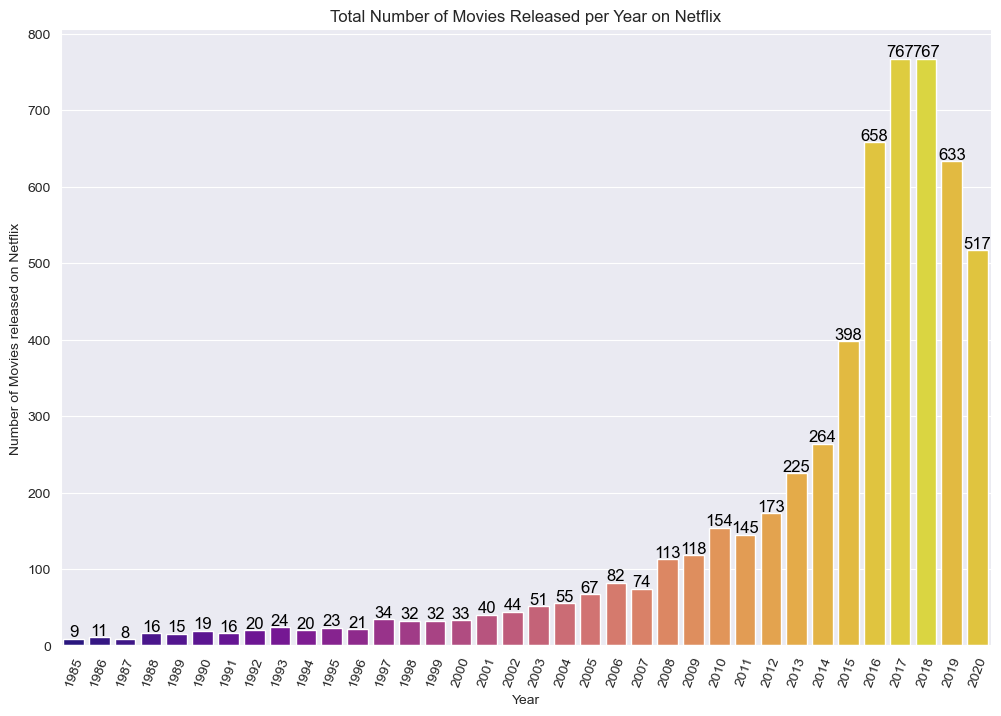

In [46]:
num_colors1 = len(movie_counts_per_year)-2
num_colors2 = 2
colors1 = sb.color_palette("plasma", n_colors = num_colors1)
colors2 = sb.color_palette("plasma", n_colors = num_colors2)

colors = colors1 + colors1[-4:-2]

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sb.barplot(data = movie_counts_per_year ,x = 'Release_Year',y = 'Show_Id', palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Movies released on Netflix')
plt.title('Total Number of Movies Released per Year on Netflix')

# Display the plot
plt.xticks(fontsize = 10,rotation=70)  # Rotate x-axis labels if needed
plt.show()

> The bar chart shows a general increasing trend in the number of movies released on Netflix, over the years
<br>
>
>> The **first significant increase** occurs from 2014 to 2015, where the number of movies released on Netflix increases by more than 50% as compared to the previous year
<br>
>>
>> Following that, the **next significant increase** occurs from 2015 to 2016, where the number of movies released by Netflix increases by more than 66%, as compared to the previous year.
<br>
>>
>> Thus, the **most significant increase** in the number of movies released on Netflix was from the year 2015 to the year 2016
<br>
>>
>> The **first significant drop** occurs from 2018-2019, where the number of movies released on Netflix drops by more than 17%, compared to the previous year
<br>
>>
>> Following that, the **next significant drop** occurs from 2019 to 2020, where the number of movies released on Netflix drops by more than 18%, compared to the previous year
<br>
>>
>> Thus, the **most significant drop** in the number of movies released on Netflix was from the year 2019 to the year 2020
<br>
>>

> We note that the highest number of movies released was in the year 2018, at 767
<br>
>
> The lowest number of movies released on Netflix was in the year 1987, when 8 Movies were released in the entirety of the year

**Now, we analyse the changes, in percentage as compared to the previous year, over the years ( with respect to the Number of movies released per year**

**We analyse the data by plotting a graph, and observing general trends over the years**

In [47]:
count_data['Percentage Change'] = (count_data['Number of Movies Released'].pct_change() * 100).fillna(0)
change_years = count_data.hvplot.line(x='Year Movie Was Released', y='Number of Movies Released', title='Change in Number of Movies Released Over the Years')
significant_points = count_data[(count_data['Percentage Change'] > 20) | (count_data['Percentage Change'] < -20)]
significant_years = significant_points['Year Movie Was Released'].values
vlines = hv.Overlay([hv.VLine(x).opts(line_color='gray', line_dash='dotted') for x in significant_years])

change_num_years_movie = (change_years * vlines).opts(
    title='Change in Number of Movies Released Over the Years',
    xlabel='Year',
    ylabel='Number of Movies Released',
    legend_position='top_left', # Position of the legend
    width = 900,
    height = 400
)
change_num_years_movie

# The vertical lines denote years in between which there was significant change in the Number of Movies Released at that year, compared to the year before

:Overlay
   .Curve.I   :Curve   [Year Movie Was Released]   (Number of Movies Released)
   .VLine.I   :VLine   [x,y]
   .VLine.II  :VLine   [x,y]
   .VLine.III :VLine   [x,y]
   .VLine.IV  :VLine   [x,y]
   .VLine.V   :VLine   [x,y]
   .VLine.VI  :VLine   [x,y]
   .VLine.VII :VLine   [x,y]

> It is clear that there is a general increasing trend in the number of movies released per year, until the year 2017
<br>
>
> From the year 2017, the number of movies released plateaud till 2018, and proceeded to experience a drastic drop from 2019 to 2020 by 18%
<br>
>
> There are 9 distinct years in which significant changes in the number of movies released. They are, 2004-2005, 2005-2006, 2007-2008, 2009-2010, 2012-2013, 2014-2015, and 2015-2016
<br>
>
>> In each of the aforementioned years, there was an increase in the number of movies released by more than 20%. We can see that as we move closer to 2018, the year in which the highest number of movies were released on Netflix, the years in which significant changes occur are closer to one another

## Conclusions:
> We have subsetted the data into years in which at least 50 movies have been released, in order to obtain salient insights on the trends over the years
<br>
>
>> This subsetting is done since we do not want to have our analysis contain "outliers", where the entire spectrum of the data spread might be compromised due to some anomalous entries
<br>
>>
> The number of movies released on Netflix has increased in general from the year 2003 to 2017, with some minor drops in 2007 and 2011. 
<br>
>
> We have also understood the times of the Year in which movies are released at a higher frequency, from our Heat-Map.
<br>
>
>> **Thus, we can conclude that a producer of films, distributing his film through Netflix, would be rationally inclined to release his/her movie anytime of the year except during the months of January, March, April, November, and December, in order to increase the chances of the movie reaping profits and not being one among a sea of other movies during the peak-seasons**

## Now, we move on to the same analysis for TV Shows

**We follow the same subsetting steps for TV Shows**

/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/1771313164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['Date_Added'] = pd.to_datetime(tv_shows['Date_Added'],errors="coerce") # Changing Data Type of values to assist data extraction
/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/1771313164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['Month'] = tv_shows['Date_Added'].dt.strftime('%B')  # Get the full month name


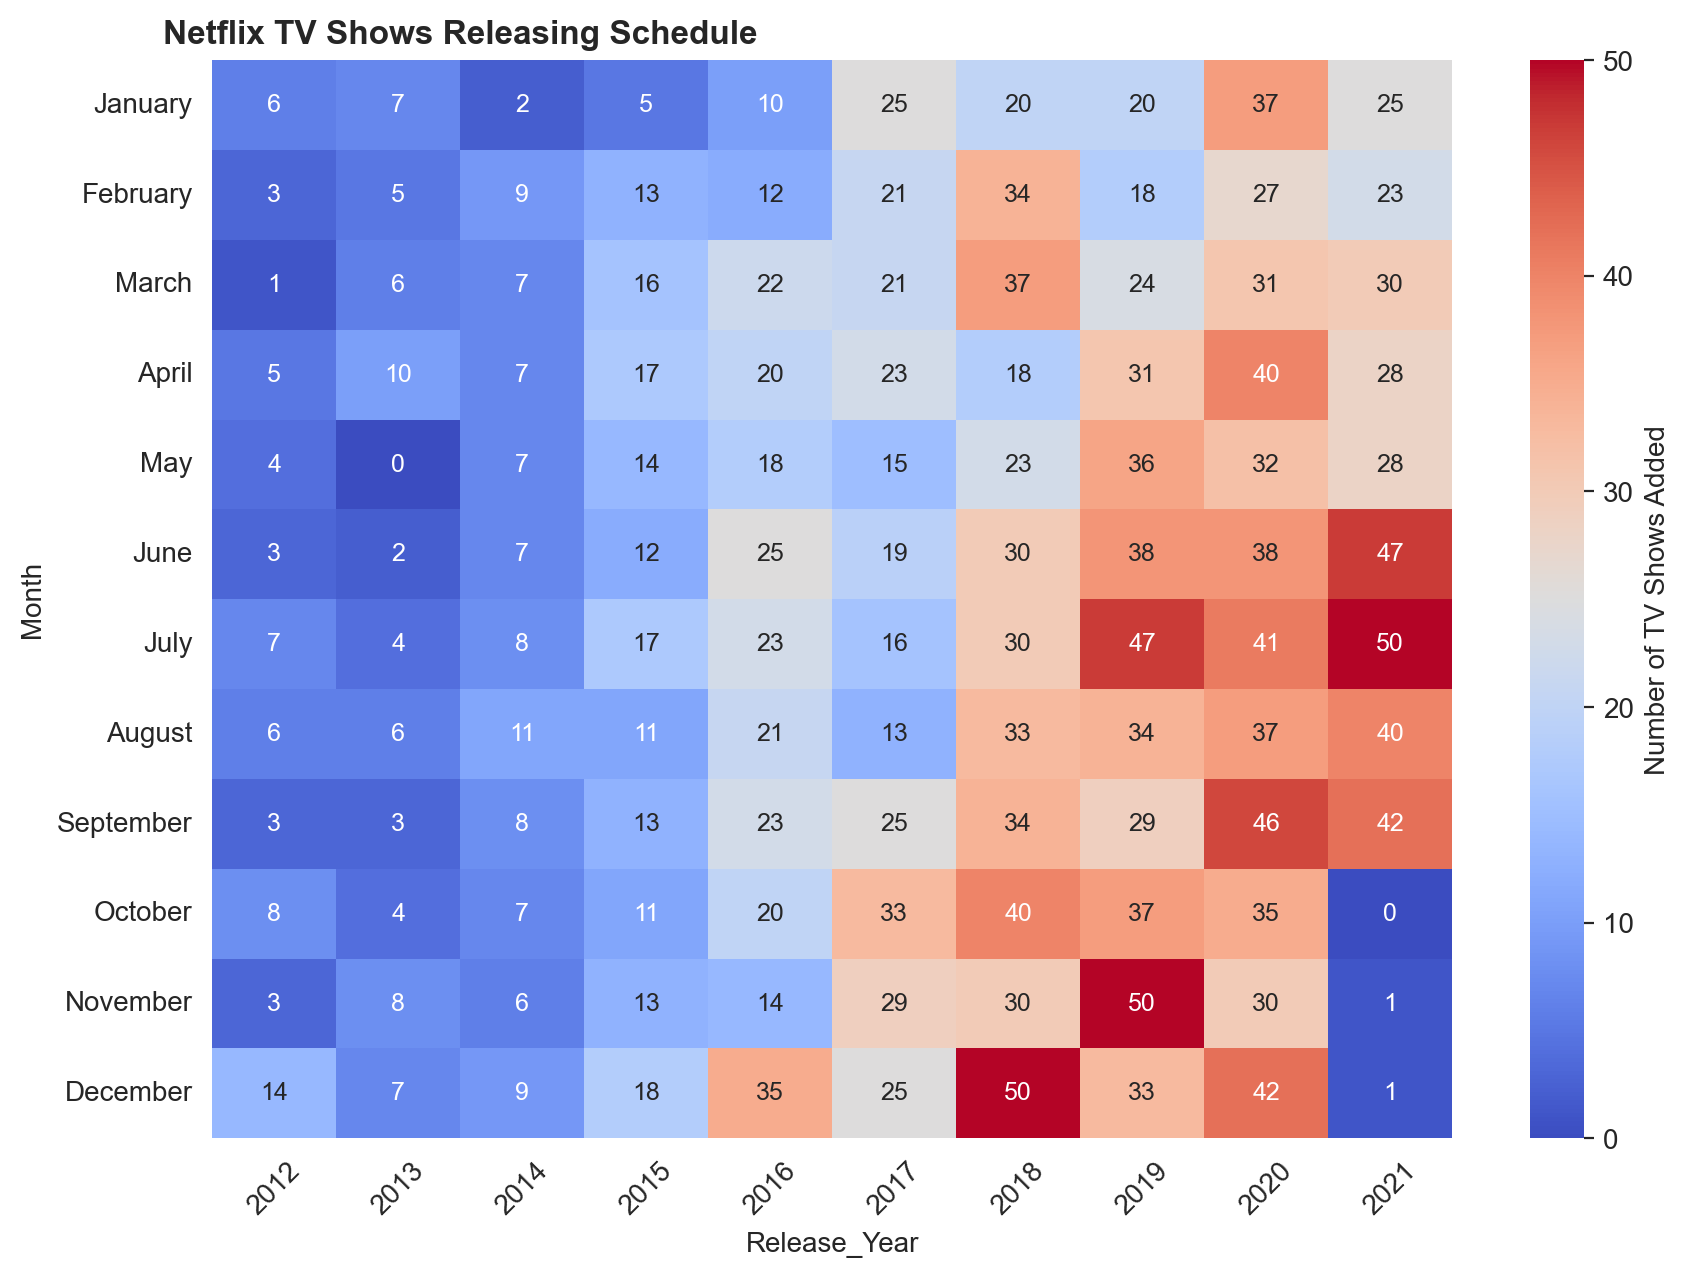

In [48]:
tv_shows['Date_Added'] = pd.to_datetime(tv_shows['Date_Added'],errors="coerce") # Changing Data Type of values to assist data extraction

tv_shows['Month'] = tv_shows['Date_Added'].dt.strftime('%B')  # Get the full month name

tv_shows = tv_shows[tv_shows['Release_Year'] >= 1985] # TO reduce density of data and improve applicability of insights

heatmap_data_subset_tv = tv_shows.pivot_table(index='Month', columns='Release_Year', values='Type', aggfunc='count', fill_value=0)

heatmap_data_subset_tv = heatmap_data_subset_tv.reindex(month_order)

# Data Subsetting process repeated below


column_sums = heatmap_data_subset_tv.sum() # Finding total number of movies released 
count_data_tv = pd.DataFrame({'Number of TV Shows Released': column_sums}) # Renaming for improved readability
count_data_tv.reset_index(inplace = True) # Converting Series to DataFrame
count_data_tv = count_data_tv.rename(columns = {'Release_Year' : 'Year TV Show Was Released'}) # Renaming for improved readability
condition_to_remove = count_data_tv['Number of TV Shows Released'] < 50 # To reduce density of data and improve insights
to_remove = count_data_tv[condition_to_remove].index # Collating relevant indexes
count_data_tv = count_data_tv.drop(to_remove) # Dropping rows
count_data_tv.reset_index(drop = True,inplace = True) # Resetting index for easier access

count_data_tv['Year TV Show Was Released']

heatmap_data_subset_tv = heatmap_data_subset_tv[count_data_tv['Year TV Show Was Released']]

plt.figure(figsize=(10, 7), dpi=200)
sb.heatmap(heatmap_data_subset_tv, cmap='coolwarm', annot=True, fmt='d', cbar=True, cbar_kws={'label': 'Number of TV Shows Added'}, annot_kws={"size": 9})
plt.title('Netflix TV Shows Releasing Schedule', fontweight='bold', position=(0.20, 1.0 + 0.02), horizontalalignment = 'center')
plt.xticks(fontsize=10, rotation=45) # We rotate the labels to improve readability
plt.yticks(fontsize=10)
plt.show()

> We notice that the trend of TV-Shows released on Netflix largely follows a similar trend with respect to the Movies released on Netflix
<br>
>
>> From 2014, there is a similar general increasing trend in the number of TV Shows released as compared to the trend for movies released on Netflix. 
<br>
>>
> However, we notice that there are differences in the months in which the most number of TV Shows were released, as compared to movies
<br>
>
>> Namely, the months of **June, July, October, November and December** seem to experience large influxes in TV Shows, as compared to the months of **November, December, January, March and April**
<br>
>>
> Similarly, we do not consider data from the year 2021, since the information obtained is imperfect in nature

**Now, we plot a similar graph for the TV Show Data**

In [49]:
count_data_tv['Percentage Change'] = (count_data_tv['Number of TV Shows Released'].pct_change() * 100).fillna(0)
change_years = count_data_tv.hvplot.line(x='Year TV Show Was Released', y='Number of TV Shows Released', title='Change in Number of TV Shows Released Over the Years')
significant_points = count_data_tv[(count_data_tv['Percentage Change'] > 20) | (count_data_tv['Percentage Change'] < -20)]
significant_years = significant_points['Year TV Show Was Released'].values
vlines = hv.Overlay([hv.VLine(x).opts(line_color='gray', line_dash='dotted') for x in significant_years])

change_num_years_tv = (change_years * vlines).opts(
    title='Change in Number of TV Shows Released Over the Years',
    xlabel='Year',
    ylabel='Number of TV Shows Released',
    legend_position='top_left', # Position of the legend
    width = 900,
    height = 400
)
change_num_years_tv


:Overlay
   .Curve.I   :Curve   [Year TV Show Was Released]   (Number of TV Shows Released)
   .VLine.I   :VLine   [x,y]
   .VLine.II  :VLine   [x,y]
   .VLine.III :VLine   [x,y]
   .VLine.IV  :VLine   [x,y]
   .VLine.V   :VLine   [x,y]

## Conclusions
> In contrast to the data obtained for Movies, we can see a clearly lesser number of years in which there was a significant change in the number of TV Shows released.
<br>
>
>> The years of Interest, for TV Shows, are 2013-2014, 2014-2015, 2015-2016, and 2017-2018
<br>
>>
> We notice that the number of TV Shows released have increased consistently over a 6 year time frame, from 2014 to 2020
<br>
>
>> Additionally, the rate of increase was the highest from 2014 to 2015, with an 81% increase, and there was only one year in which there was a decrease in the number of TV Shows released, which were the periods between 2012 and 2013<br>( ***We do not consider data from 2021*** )

## Now, we analyse the data pertaining to Countries of Origin, for both Movies and TV Shows on Netflix

#### Primary purpose is to introduce new methods of Visualisation

In [50]:
year_selector = pn.widgets.Select(name="Select Year", options=['All'] + count_data_tv['Year TV Show Was Released'].unique().astype(str).tolist())
sorter_num_shows = pn.widgets.Select(name="Sort DataFrame by Number of TV Shows Released", options=['None', 'Ascending', 'Descending'])
sorter_percent_change = pn.widgets.Select(name="Sort DataFrame by Percentage Change", options=['None', 'Ascending', 'Descending'])

@pn.depends(year_selector, sorter_num_shows, sorter_percent_change)
def filtered_data(year_selector, sorter_num_shows, sorter_percent_change):
    filtered_df = count_data_tv.copy()
    column1 = 'Number of TV Shows Released'
    column2 = 'Percentage Change'

    if year_selector != 'All':
        year_selector = int(year_selector)
        filtered_df = filtered_df[filtered_df['Year TV Show Was Released'] == year_selector]
    if sorter_num_shows == 'Ascending':
        filtered_df = filtered_df.sort_values(by=column1, ascending=True)
    elif sorter_num_shows == 'Descending':
        filtered_df = filtered_df.sort_values(by=column1, ascending=False)
    if sorter_percent_change == 'Ascending':
        filtered_df = filtered_df.sort_values(by=column2, ascending=True)
    elif sorter_percent_change == 'Descending':
        filtered_df = filtered_df.sort_values(by=column2, ascending=False)

    return filtered_df

dashboard_shows = pn.Column(
    pn.Row("### TV Show Statistics"),
    year_selector,
    sorter_num_shows,
    sorter_percent_change,
    pn.panel(filtered_data, height=400, width=800),
    width=800
)

dashboard_shows.servable()

Column(width=800)
    [0] Row
        [0] Markdown(str)
    [1] Select(options=['All', '2012', ...], value='All')
    [2] Select(name='Sort DataFrame b..., options=['None', 'Ascending', ...], value='None')
    [3] Select(name='Sort DataFrame b..., options=['None', 'Ascending', ...], value='None')
    [4] ParamFunction(function, _pane=DataFrame, defer_load=False, height=400, sizing_mode='fixed', width=800)

### Movies

#### We create a DataFrame to store the number of movies released, per country

In [51]:
df_count = df.assign(Country=df['Country'].str.split(', ')).explode('Country')

movies_count = df_count[df_count['Type'] == 'Movie']

movies_count = movies_count[movies_count['Country'] != ''] # Removing all empty values

movies_count['Country'] = movies_count['Country'].str.rstrip(', ')

country_movie_counts = movies_count.groupby('Country')['Type'].count().reset_index()

country_movie_counts = country_movie_counts.rename(columns={'Type': 'Number of Movies'})

country_movie_counts = country_movie_counts.groupby('Country')['Number of Movies'].sum().reset_index() # Removing Duplicate Entries

In [52]:
country_movie_counts

,Country,Number of Movies
0,Afghanistan,1
1,Albania,1
2,Algeria,3
3,Angola,1
4,Argentina,71
...,...,...
113,Vatican City,1
114,Venezuela,4
115,Vietnam,7
116,West Germany,3


In [53]:
geolocator = Nominatim(user_agent="Netflix_Movies")

# Geocode countries and add coordinates to the DataFrame
country_movie_counts['Location'] = country_movie_counts['Country'].apply(geolocator.geocode)
country_movie_counts['Latitude'] = country_movie_counts['Location'].apply(lambda loc: loc.latitude if loc else None)
country_movie_counts['Longitude'] = country_movie_counts['Location'].apply(lambda loc: loc.longitude if loc else None)

In [54]:
# Create a Folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add markers for each country with pop-up information
for index, row in country_movie_counts.iterrows():
    if row['Latitude'] and row['Longitude']:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Country']} - {row['Number of Movies']} Movies"
        ).add_to(m)

# Display the map
m

**We collate information on the Countries which release the least number of movies on Netflix**

In [55]:
min_output_countries_movies = list(country_movie_counts[country_movie_counts['Number of Movies'] == country_movie_counts['Number of Movies'].min()]['Country'])
print(f'Countries which have released the least number of movies on Netflix are printed below \n\nEach Country released the same number of Movies on Netflix\n\nNumber of Movies Released : {country_movie_counts["Number of Movies"].min()}\n\nCountries : {min_output_countries_movies}')

Countries which have released the least number of movies on Netflix are printed below 

Each Country released the same number of Movies on Netflix

Number of Movies Released : 1

Countries : ['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Bahamas', 'Bermuda', 'Botswana', 'Burkina Faso', 'Cameroon', 'Dominican Republic', 'East Germany', 'Ecuador', 'Ethiopia', 'Jamaica', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malawi', 'Mauritius', 'Mongolia', 'Montenegro', 'Mozambique', 'Nicaragua', 'Palestine', 'Panama', 'Paraguay', 'Samoa', 'Slovakia', 'Somalia', 'Sri Lanka', 'Sudan', 'Uganda', 'Ukraine', 'Vatican City']


**We plot the above data to view the population distribution**

**We plot in Matplotlib to show sequential colour patterns**

> It is clear that the United States has released the most movies on Netflix, at a whopping 2752 Movies
<br>
>
> Following the United States, India has released 962 movies on Netflix, and is followed by the United Kingdom, which has released 534 movies on Netflix.
<br>
>
> Interestingly, a sizeable bulk of the movies on Netflix, 440 to be exact, are from Unknown Countries of Origin. <br>
>
> The countries which have released the least number of movies on Netflix are listed below

#### TV Shows

In [56]:
df_count = tv_shows.assign(Country=df['Country'].str.split(', ')).explode('Country')

tv_shows_count = df_count[df_count['Type'] == 'TV Show']

tv_shows_count = tv_shows_count[tv_shows_count['Country'] != ''] # Removing all empty values

tv_shows_count['Country'] = tv_shows_count['Country'].str.rstrip(', ')

country_tv_show_counts = tv_shows_count.groupby('Country')['Type'].count().reset_index()

country_tv_show_counts = country_tv_show_counts.rename(columns={'Type': 'Number of TV Shows'})

country_tv_show_counts = country_tv_show_counts.groupby('Country')['Number of TV Shows'].sum().reset_index()

country_tv_show_counts

,Country,Number of TV Shows
0,Algeria,3
1,Angola,1
2,Argentina,23
3,Australia,43
4,Austria,2
...,...,...
77,United States,1036
78,Uruguay,4
79,Venezuela,1
80,Vietnam,3


In [57]:
geolocator = Nominatim(user_agent="Netflix_TV_Shows")

# Geocode countries and add coordinates to the DataFrame
country_tv_show_counts['Location'] = country_tv_show_counts['Country'].apply(geolocator.geocode)
country_tv_show_counts['Latitude'] = country_tv_show_counts['Location'].apply(lambda loc: loc.latitude if loc else None)
country_tv_show_counts['Longitude'] = country_tv_show_counts['Location'].apply(lambda loc: loc.longitude if loc else None)

In [58]:
country_movie_counts = country_movie_counts.sort_values(by='Number of Movies', ascending=False)

# Create the bar chart using hvplot
bar_chart_movies_country = country_movie_counts.hvplot.bar(
    x='Country',
    y='Number of Movies',
    xlabel='Country',
    ylabel='Number of Movies',
    title='Number of Movies Released on Netflix, Sorted by Country',
    rot=45, # To improve readability
    width=10000,
    height=400,
)

labels_movies_country = hv.Labels(country_movie_counts, kdims = ['Country','Number of Movies'], vdims = 'Number of Movies')

# Display the bar chart
bar_chart_movies_country * labels_movies_country

:Overlay
   .Bars.I   :Bars   [Country]   (Number of Movies)
   .Labels.I :Labels   [Country,Number of Movies]   (Number of Movies)

In [59]:
# Create a Folium map
m = folium.Map(location=[20, 0], zoom_start=2)

# Add markers for each country with pop-up information
for index, row in country_tv_show_counts.iterrows():
    if row['Latitude'] and row['Longitude']:
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Country']} - {row['Number of TV Shows']} TV Shows"
        ).add_to(m)

# Display the map
m

**We collate information on the Countries which release the least number of TV Shows on Netflix**

In [60]:
min_output_countries_tv_shows = list(country_tv_show_counts[country_tv_show_counts['Number of TV Shows'] == country_tv_show_counts['Number of TV Shows'].min()]['Country'])
print(f'Countries which have released the least number of TV Shows on Netflix are printed below \n\nEach Country released the same number of TV Shows on Netflix\n\nNumber of Movies Released : {country_tv_show_counts["Number of TV Shows"].min()}\n\nCountries : {min_output_countries_tv_shows}')

Countries which have released the least number of TV Shows on Netflix are printed below 

Each Country released the same number of TV Shows on Netflix

Number of Movies Released : 1

Countries : ['Angola', 'Bangladesh', 'Belarus', 'Burkina Faso', 'Cameroon', 'Cayman Islands', 'Ethiopia', 'Greece', 'Mauritius', 'Mozambique', 'Namibia', 'Nepal', 'Palestine', 'Peru', 'Puerto Rico', 'Senegal', 'Venezuela', 'Zimbabwe']


In [61]:
country_tv_show_counts = country_tv_show_counts.sort_values(by='Number of TV Shows', ascending=False)

bar_chart_tv_shows_country = country_tv_show_counts.hvplot.bar(
    x='Country',
    y='Number of TV Shows',
    xlabel='Country',
    ylabel='Number of TV Shows',
    title='Number of TV Shows Released on Netflix, Sorted by Country',
    rot=45, # To improve readability
    width=10000,
    height=400,
)

labels_tv_shows_country = hv.Labels(country_tv_show_counts, kdims = ['Country','Number of TV Shows'], vdims = 'Number of TV Shows')

bar_chart_tv_shows_country * labels_tv_shows_country

:Overlay
   .Bars.I   :Bars   [Country]   (Number of TV Shows)
   .Labels.I :Labels   [Country,Number of TV Shows]   (Number of TV Shows)

> It is clear that the United States has released the most TV Shows on Netflix, at a count of 1036
<br>
>
> Following the United States, movies of Unknown Countries of Origin have a whopping count of 430. If such data is indexed and categorised properly, more precise metrics can be obtained.
<br>
>
> Following that, India has released 239 TV Shows on Netflix, and is followed by the United Kingdom, which has released 200 TV Shows on Netflix.
<br>
>
> The countries which have released the least number of TV Shows on Netflix are listed below

**We find the country / countries which has / have released both the highest / lowest number of Movies on Netflix, AND the highest / lowest number of TV Shows on Netflix**

In [62]:
set1 = set(list(country_movie_counts[country_movie_counts['Number of Movies'] == country_movie_counts['Number of Movies'].max()]['Country']))
set2 = set(list(country_tv_show_counts[country_tv_show_counts['Number of TV Shows'] == country_tv_show_counts['Number of TV Shows'].max()]['Country']))

# Find the common elements (intersection)
common_elements = set1.intersection(set2)

# Convert the result back to a list if needed
common_elements_list = list(common_elements)

if (len(common_elements_list)==1):
    print(f"Country which released the most number of Movies AND TV Shows: {common_elements_list[0]}")
elif (len(common_elements_list) > 1):
    print(f"Countries which released the least number of Movies AND TV Shows: {common_elements_list}")                

Country which released the most number of Movies AND TV Shows: United States


In [63]:
min_output_countries_tv_shows

set1 = set(min_output_countries_movies)
set2 = set(min_output_countries_tv_shows)

# Find the common elements (intersection)
common_elements = set1.intersection(set2)

# Convert the result back to a list if needed
common_elements_list = list(common_elements)

if (len(common_elements_list)==1):
    print(f"Country which released the least number of Movies AND TV Shows: {common_elements_list[0]}")
elif (len(common_elements_list) > 1):
    print(f"Countries which released the least number of Movies AND TV Shows: {common_elements_list}")

Countries which released the least number of Movies AND TV Shows: ['Cameroon', 'Mozambique', 'Palestine', 'Angola', 'Burkina Faso', 'Ethiopia', 'Mauritius']


> The Country that has released the **most Movies and TV Shows** on Netflix is the **United States of America**
<br>
> The Counties that have released the **least Movies and TV Shows** on Netflix are; **Ethiopia', Palestine, Burkina Faso, Mozambique, Cameroon, Angola, and Mauritius**

## Now, we proceed to analyse Movies and TV Shows based on their Rating

**The 'Rating' Column refers to the Age-Rating of a Movie or TV-Show**

In [64]:
rating_counts = movies.groupby('Rating')['Type'].count().reset_index()

rating_counts = rating_counts.rename(columns={'Type': 'Number of Movies'})

rating_counts = rating_counts.sort_values(by = 'Number of Movies', ascending = False)

bar_plot_rsting_movies = rating_counts.hvplot.bar(x='Rating', y='Number of Movies', title='Number of Movies by Age Rating', width = 1000, height = 600)

labels_rating_movies = hv.Labels(rating_counts, kdims = ['Rating','Number of Movies'], vdims = 'Number of Movies')

bar_plot_rsting_movies * labels_rating_movies

:Overlay
   .Bars.I   :Bars   [Rating]   (Number of Movies)
   .Labels.I :Labels   [Rating,Number of Movies]   (Number of Movies)

> We notice that there are some entries in the 'Ratings' Column which are anomalies and do not correspond to the columns values (Known through Domain Knowledge)
<br>
>
> We remove the values from the 'Ratings' Column

In [65]:
movies = movies[(movies['Rating'] != "74 min") & (movies['Rating'] != "84 min") & (movies['Rating'] != "66 min")] # Removing the specific values in the 'Rating' Column which are erroneous

In [66]:
rating_counts = movies.groupby('Rating')['Type'].count().reset_index()

rating_counts = rating_counts.rename(columns={'Type': 'Number of Movies'})

rating_counts = rating_counts.sort_values(by = 'Number of Movies', ascending = False)

bar_plot_rsting_movies = rating_counts.hvplot.bar(x='Rating', y='Number of Movies', title='Number of Movies by Age Rating', width = 1000, height = 600)

labels_rating_movies = hv.Labels(rating_counts, kdims = ['Rating','Number of Movies'], vdims = 'Number of Movies')

bar_plot_rsting_movies * labels_rating_movies

:Overlay
   .Bars.I   :Bars   [Rating]   (Number of Movies)
   .Labels.I :Labels   [Rating,Number of Movies]   (Number of Movies)

> We can understand from the Bar Plot that a vast majority of Movies on Netflix, 1930 Movies, which make up more than **34% of all rated Movies on Netflix, are rated TV-MA**.
<br>
>
>> TV-MA is classified to be "Mature Audience Only". The reason for such classification is because of the Movie being specifically designed to be viewed by adults and, therefore, being unsuitable for children under 17.
<br>
>>
> The next most popular Rating is the **TV-14 Rating**, which is held by **1295 movies**, making up **more than 23% of all rated Movies on Netflix**
<br>
>
>> The TV-14 Rating means that the Movie contains material that most parents would find unsuitable for children under 14 years of age.
<br>
>>
> The next most popular Rating is the **R Rating**, which is held by **750 movies**, making up **more than 13% of all rated Movies on Netflix**
<br>
>
>> The R Rating means that persons under 17 require an accompanying parent or adult guardian, and that the Movie Contains some adult material.
<br>
>>
> From Analysis, it can be surmised that the R-Rating and the TV-MA Rating are not exactly the same. TV-MA rated Movies are not to be watched, under any circumstances, by persons under 17. However, an R-Rated movie can be watched by persons under 17, if they are accompanied by a parent or an adult guardian
<br>
>
> All of the Information above are Domain Knowledge, learnt from the **Motion Picture Association of America (MPAA)**
<br>
>

### What is the distribution of Ratings, for Movies, in the United States?

In [67]:
us_data = movies[movies['Country'] == 'United States']

# Count the occurrences of each unique rating
rating_counts = us_data['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Create a bar plot of the ratings distribution using hvplot
bar_rating = rating_counts.hvplot(x='Rating', y='Count', kind='bar', title='Distribution of Ratings in the United States')
labels_rating = hv.Labels(data = rating_counts, kdims = ['Rating','Count'], vdims = 'Count')

# Display the bar plot
bar_rating * labels_rating

:Overlay
   .Bars.I   :Bars   [Rating]   (Count)
   .Labels.I :Labels   [Rating,Count]   (Count)

> **We notice that a majority of the movies from the United States are TV-MA Rated**
<br>
>
>> This indicates that a majority of the movies that are released onto Netflix, from the United States, are catered to the Adult Demographic

#### TV Shows

In [68]:
rating_counts = tv_shows.groupby('Rating')['Type'].count().reset_index()

rating_counts = rating_counts.rename(columns={'Type': 'Number of TV Shows'})

rating_counts = rating_counts.sort_values(by = 'Number of TV Shows', ascending = False)

bar_plot_rating_tv_shows = rating_counts.hvplot.bar(x='Rating', y='Number of TV Shows', title='Number of TV Shows by Age Rating', rot=45, width = 1000, height = 600)

labels_rating_tv_shows = hv.Labels(rating_counts, kdims = ['Rating','Number of TV Shows'], vdims = 'Number of TV Shows')

bar_plot_rating_tv_shows * labels_rating_tv_shows 

:Overlay
   .Bars.I   :Bars   [Rating]   (Number of TV Shows)
   .Labels.I :Labels   [Rating,Number of TV Shows]   (Number of TV Shows)

**We plot in Matplotlib to show sequential colour patterns**

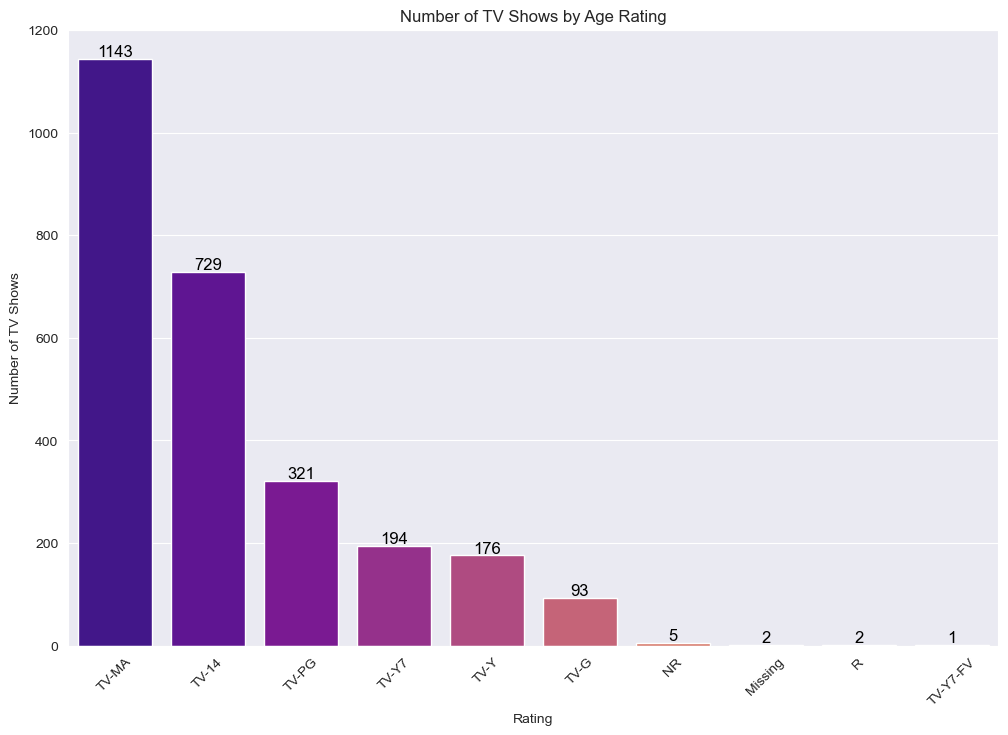

In [69]:
num_colors = len(rating_counts)
colors = sb.color_palette("plasma", n_colors=num_colors)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sb.barplot(data = rating_counts,x = 'Rating',y = 'Number of TV Shows', palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Number of TV Shows')
plt.title('Number of TV Shows by Age Rating')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### What is the distribution of Ratings, for TV Shows, in the United States?

In [70]:
us_data = tv_shows[tv_shows['Country'] == 'United States']

# Count the occurrences of each unique rating
rating_counts = us_data['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# Create a bar plot of the ratings distribution using hvplot
bar_rating_tv = rating_counts.hvplot(x='Rating', y='Count', kind='bar', title='Distribution of Ratings in the United States')
labels_rating_tv = hv.Labels(data = rating_counts, kdims = ['Rating','Count'], vdims = 'Count')### What is the distribution of Ratings in the United States?

# Display the bar plot
bar_rating_tv * labels_rating_tv

:Overlay
   .Bars.I   :Bars   [Rating]   (Count)
   .Labels.I :Labels   [Rating,Count]   (Count)

> **We notice that a majority of the Tv Shows from the United States are TV-MA Rated**
<br>
>
>> This indicates that a majority of the TV Shows that are released onto Netflix, from the United States, are catered to the Adult Demographic

> We can understand from the Bar Plot that a majority of rated TV Shows on Netflix, 1143 Movies, which make up more than **42% of all rated TV Shows on Netflix, are rated TV-MA**.
<br>
>
>> TV-MA is classified to be "Mature Audience Only". The reason for such classification is because of the Movie being specifically designed to be viewed by adults and, therefore, being unsuitable for children under 17.
<br>
>>
> The next most popular Rating is the **TV-14 Rating**, which is held by **729 TV Shows**, making up **more than 27% of all rated TV Shows on Netflix**
<br>
>
>> The TV-14 Rating means that the Movie contains material that most parents would find unsuitable for children under 14 years of age.
<br>
>>
> The next most popular Rating is the **TV-PG Rating**, which is held by **321 movies**, making up **more than 12% of all rated Movies on Netflix**
<br>
>
>> The TV-PG Rating means that Parental Guidance is suggested. The TV Show rated as such contains material that parents may find unsuitable for younger children
<br>
>>
> The data we have obtained for TV-Shows on Netflix differs to a certain extent from the data obtained for Movies on Netflix. While the first and second most popular Rating categories for both Movies and TV Shows are TV-MA and TV-14, the third most Popular category for TV-Shows is TV-PG, while it is R for Movies
<br>
>
> All of the Information above are Domain Knowledge, learnt from the **Motion Picture Association of America (MPAA)**
<br>
>

## At this point, we need additional data for Analysis.
## Thus, we import another Dataset, which includes IMDB Ratings for movies

In [71]:
movie_reviews = pd.read_csv('IMDb movies.csv',sep=',')
movie_reviews = movie_reviews[['imdb_title_id','title','year','avg_vote','genre','director','votes','reviews_from_users','reviews_from_critics']]
movie_reviews = movie_reviews.rename(columns = {'title': 'Title','year':'Release_Year','director':'Director'})

/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/2301863190.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_reviews = pd.read_csv('IMDb movies.csv',sep=',')


### After importing the Dataset, we perform an inner join with our original DataFrame for Movies. We do this so that each movie, which is included in the IMDB and Movies Dataset, can have it's own Rating

In [72]:
combined_df_movies_rating = movies.merge(movie_reviews, on='Title',how='inner')
combined_df_movies_rating = combined_df_movies_rating.drop(columns = ['Director_y','Release_Year_y'])
combined_df_movies_rating = combined_df_movies_rating.rename(columns = {'Director_x':'Director','Release_Year_x':'Release_Year'})

# We rename our columns and drop duplicate columns

In [73]:
ratings_movies = pd.read_csv('IMDb ratings.csv',sep=',')
ratings_movies.columns # We extract the weighted average vote
ratings_movies = ratings_movies[['imdb_title_id','weighted_average_vote']]
ratings_movies

,imdb_title_id,weighted_average_vote
0,tt0000009,5.9
1,tt0000574,6.1
2,tt0001892,5.8
3,tt0002101,5.2
4,tt0002130,7.0
...,...,...
85850,tt9908390,5.3
85851,tt9911196,7.7
85852,tt9911774,7.9
85853,tt9914286,6.4


In [74]:
movies_ratings_df = combined_df_movies_rating.merge(ratings_movies, on='imdb_title_id', how='inner')
movies_ratings_df = movies_ratings_df.drop(columns = ['imdb_title_id','reviews_from_users','reviews_from_critics','votes'])
movies_ratings_df.info()

# We merge the dataframes and drop unrequired columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2493 entries, 0 to 2492
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Show_Id                2493 non-null   object        
 1   Type                   2493 non-null   object        
 2   Title                  2493 non-null   object        
 3   Director               2493 non-null   object        
 4   Cast                   2493 non-null   object        
 5   Country                2493 non-null   object        
 6   Date_Added             2493 non-null   datetime64[ns]
 7   Release_Year           2493 non-null   int64         
 8   Rating                 2493 non-null   object        
 9   Duration               2493 non-null   object        
 10  Listed_In              2493 non-null   object        
 11  Description            2493 non-null   object        
 12  Month                  2493 non-null   object        
 13  avg

In [75]:
movies_ratings_df.drop_duplicates(subset=['Title','Release_Year','weighted_average_vote'], inplace=True) # We drop all duplicates
movies_ratings_df.dropna() # We drop all NA Values

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description,Month,avg_vote,genre,weighted_average_vote
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,6.9,Drama,6.9
1,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,September,6.5,"Comedy, Drama, Romance",6.5
2,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",September,6.3,"Crime, Drama, Mystery",6.3
3,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France",2021-09-19,2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ...",September,4.9,"Drama, Thriller",4.9
4,s49,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,2021-09-16,2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...,September,7.7,"Crime, Drama, Thriller",7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2488,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,March,6.7,"Crime, Drama, Thriller",6.7
2489,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",November,7.7,"Crime, Drama, Mystery",7.7
2490,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,4.4,"Action, Adventure, Comedy",4.4
2491,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",January,6.1,"Animation, Comedy, Drama",6.1


#### Now that we have cleaned our data, we proceed to analyse it

### We will use the 'weighted_average_vote' as our metric for the IMDB Ratings for Movies, since the average weighted votes will balance outliers, and provides a more robust metric, since it ensures that ***movies with Different Levels of Popularity can be compared fairly***

#### Movies

### What are the Top 10 Movies on Netflix?

In [76]:

movies_ratings_df = movies_ratings_df.sort_values(by='weighted_average_vote',ascending=False) # Sorting

top_10_movies = movies_ratings_df[:10]

top_10_movie_ratings = top_10_movies.hvplot.bar(x='Title',y='weighted_average_vote', title = 'Top 10 Movies On Netflix, by IMDB Rating', width = 1000, height=400, rot=45, ylim=(8, 9)) # Rotation of xticks labels done to improve readability

labels_movieratings = hv.Labels(top_10_movies, kdims = ['Title','weighted_average_vote'], vdims = 'weighted_average_vote')

top_10_movie_ratings * labels_movieratings

:Overlay
   .Bars.I   :Bars   [Title]   (weighted_average_vote)
   .Labels.I :Labels   [Title,weighted_average_vote]   (weighted_average_vote)

**We plot the same graph in MatplotLib to show Sequential Colour Patterns**"

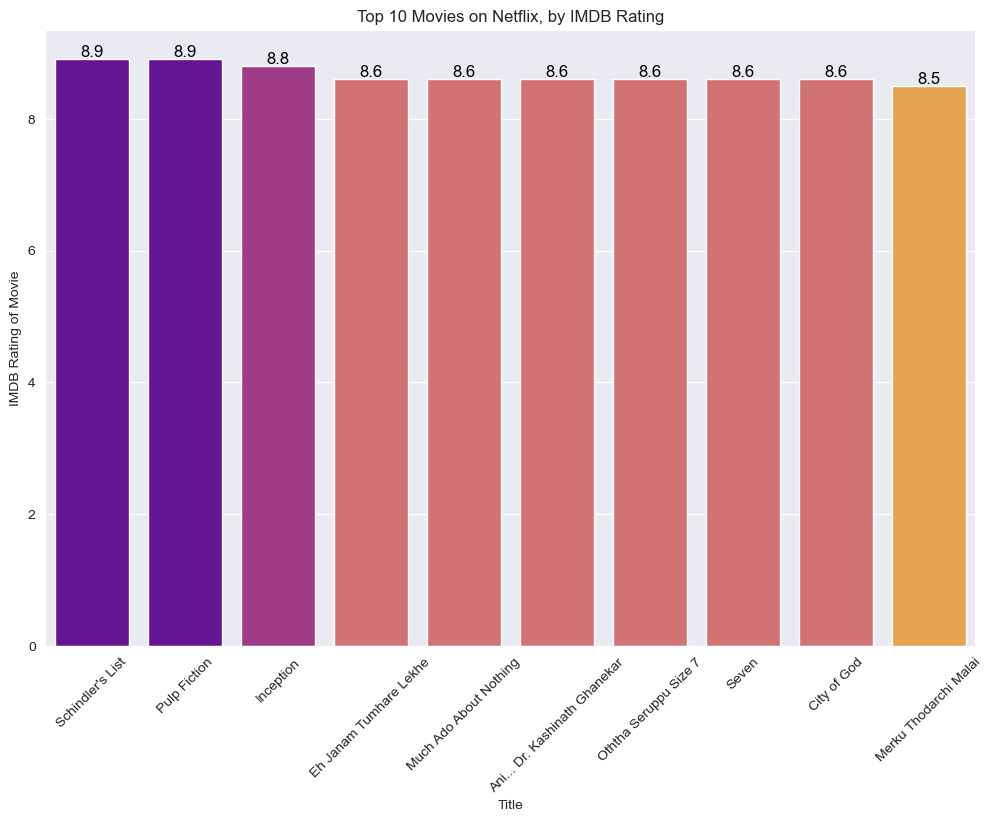

In [77]:
num_colors1 = len(top_10_movies[:2])
num_colors2 = len(top_10_movies[2:3])
num_colors3 = len(top_10_movies[3:9])
num_colors4 = len(top_10_movies[9:10])
num_colors = 4

colors = sb.color_palette("plasma", n_colors= num_colors)
colors1 = colors[:1]
colors2 = colors[1:2]
colors3 = colors[2:3]
colors4 = colors[3:4]

colors = colors1 + colors1 + colors2 + (colors3 * 6) + colors4

plt.figure(figsize=(12, 8))
ax = sb.barplot(data = top_10_movies,x = 'Title',y = 'weighted_average_vote', palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Title')
plt.ylabel('IMDB Rating of Movie')
plt.title('Top 10 Movies on Netflix, by IMDB Rating')

# Display the plot
plt.xticks(rotation=45) # Rotating labels to improve readability
plt.show()

> We note that the **Most Popular Movie** on Netflix is **'Schindler's List'**, which has a weighted_average_vote of **8.9**, followed by **Pulp Fiction**, which has a weighted_average_vote of **8.9** as well, and **Inception**, which has a weighted_average_vote of **8.8**

**Now, we clean the DataFrame based on the 'Country' Column**

In [78]:
top_10_movies['Country']

2186                    United States
2119                    United States
59      United States, United Kingdom
1744                            India
1472     Chile, United States, France
362                             India
746                             India
176                           Missing
1682          Brazil, France, Germany
987                             India
Name: Country, dtype: object

**We note that there is 1 Null Entry in the 'Country' Column, we proceed to rename it and clean the values**

In [79]:
rows_with_na = top_10_movies[top_10_movies['Country'] == 'Missing']
title = rows_with_na['Title'].tolist()[0]
director = rows_with_na['Director'].tolist()[0]
print(f"Title of Movie with Nan Country Column : {title}\n\nDirector of Movie with Nan Country Column : {director}")

Title of Movie with Nan Country Column : Seven

Director of Movie with Nan Country Column : Tosin Igho


**From Domain Knoowledge, we know that the aforementioned movie is a Nigerian Movie, and we reflect this information in the DataFrame**

In [80]:
top_10_movies['Country'][176] = 'Nigeria'
top_10_movies['Country']

/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/3151825804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_movies['Country'][176] = 'Nigeria'


2186                    United States
2119                    United States
59      United States, United Kingdom
1744                            India
1472     Chile, United States, France
362                             India
746                             India
176                           Nigeria
1682          Brazil, France, Germany
987                             India
Name: Country, dtype: object

#### Now, we compare the Top 10 Rated Movies based on their Country of Origin

In [81]:
temp = top_10_movies[['Title','Country','weighted_average_vote']]
movies_10_countries = temp.hvplot.scatter(x='Country', y='Title', c='weighted_average_vote', width=1800, height=400,size=100)
movies_10_countries

:Scatter   [Country]   (Title,weighted_average_vote)

> We note that a bulk of the Top 10 Movies on Netflix were released from India

**We find the number of Top 10 movies from unique Countries, and represent the information in a Bar Plot**

In [82]:
country_top10 = top_10_movies['Country'].value_counts().reset_index()

# Rename the columns for clarity
country_top10.columns = ['Country', 'Movie Count']

# Display the DataFrame
country_top10

,Country,Movie Count
0,India,4
1,United States,2
2,"United States, United Kingdom",1
3,"Chile, United States, France",1
4,Nigeria,1
5,"Brazil, France, Germany",1


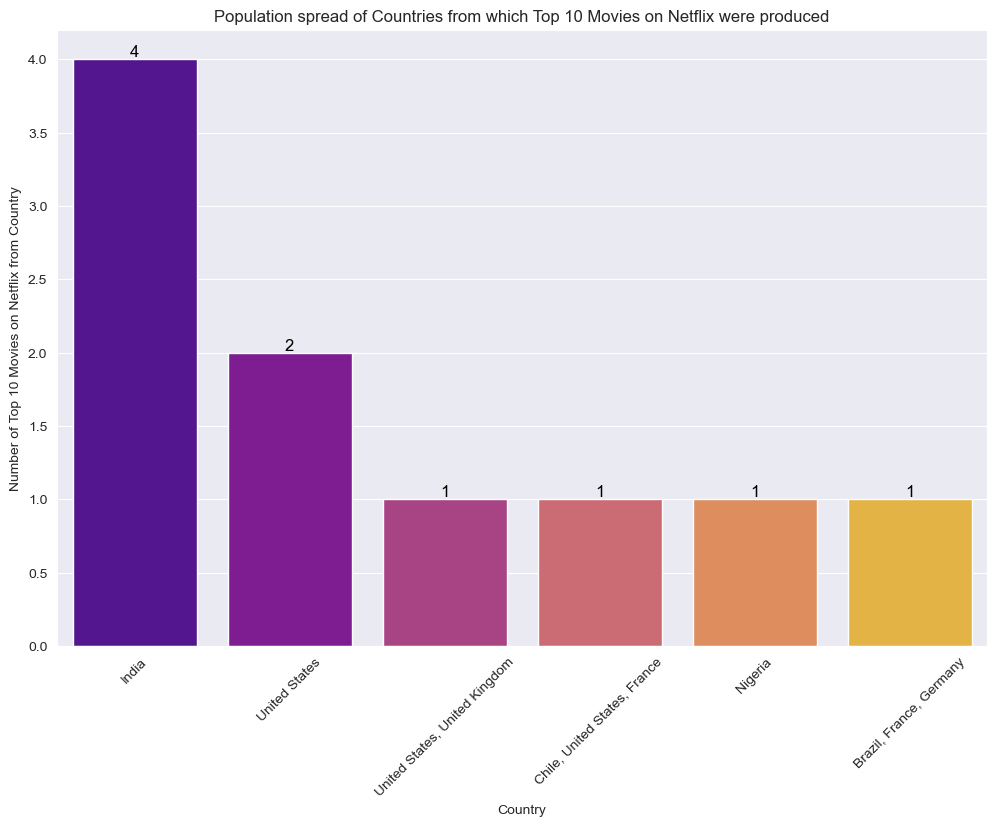

In [83]:
num_colors = len(country_top10)
colors = sb.color_palette("plasma", n_colors=num_colors)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sb.barplot(data = country_top10,x = 'Country',y = 'Movie Count', palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Top 10 Movies on Netflix from Country')
plt.title('Population spread of Countries from which Top 10 Movies on Netflix were produced')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

> We can surmise from the plot above that **4 Movies**, out of the Top 10 Movies on Netflix, are from **India**. Thus, **India** has produced the **most number of Movies from the Top 10** Movies on Netflix
<br>
>
> After India, the **United States** has produced **2 of the Top 10** Movies on Netflix. 
<br>
>
>> This is an interesting measure of **Quality over Quantity**. As we have discovered before, the **United States** has released the largest number of Movies on Netflix, at **2752 Movies**. Comparatievly, **India** has only released around 35% of the number of Movies released by the United States, on Netflix, at **962** Movies.
<br>
>>
>> Even though this is the case in the amount of Movies released, on average, **Indian movies in the top 10 have received higher ratings than those from the United States**. This implies that the quality of Movies released on Netflix from India are greater in quality, on average, than the United States

## Now, we perform Analysis on the Genres of the Top 10 Movies

#### We need to change the way values are written in the Listed_In Column

### What are the Genres of the Top 10 Movies on Netflix?

In [84]:
top_10_movies['genre'] = top_10_movies['genre'].str.split(', ')


top_10_movies = top_10_movies.explode('genre')


plot_movies = top_10_movies.hvplot.scatter(
    x='genre',
    y='Title',
    by = 'weighted_average_vote',
    xlabel='Genre',
    ylabel='Title',
    title='Top 10 Movies on Netflix, by Genre',
    rot=45,
    width=800,
    height=400,
    size=100
)

# Display the plot
plot_movies

/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/2431378523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_movies['genre'] = top_10_movies['genre'].str.split(', ')


:NdOverlay   [weighted_average_vote]
   :Scatter   [genre]   (Title)

> We note, from the Scatter Plot above, that a majority of the higher rated Movies belong to the 'Drama' genre
<br>
>
>> The Movies, 'Schindler's List', 'Pulp Fiction', 'City of God', 'Seven', 'Oththa Seruppu Size 7', 'Ani...Dr. Kashinath Ghanekar', 'Seven', 'City of God', and 'Merku Thodarchi Malai'
<br>
>>
> 6 of the Top 10 Movies are a Mix of Genres. Only 4 Movies of the Top 10 Movies, namely, 'Eh Janam Tumhare Lekhe' belongs to the distinct genre of Biography, while 'Oththa Seruppu Size 7', 'Ani... Dr.Kashinath Ghanekar', and 'Merku Thodarchi Malai' are of the Distinct Genres of Dramas
<br>
>

**We plot the Average Votes for each Movie against the Title of the Movie and the Genre of the Movie, using a Scatter Plot, for the Top 10 Movies in Netflix**

In [85]:
top_10_movies.head(5)

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description,Month,avg_vote,genre,weighted_average_vote
2186,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,April,8.9,Biography,8.9
2186,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,April,8.9,Drama,8.9
2186,s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,April,8.9,History,8.9
2119,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,January,8.9,Crime,8.9
2119,s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,January,8.9,Drama,8.9


In [86]:
top_10_movie_age_rating = top_10_movies.hvplot.scatter(x='Title', y='weighted_average_vote', by='Rating', title='IMDB Rating VS Age Rating', xlabel='Age Rating', ylabel='Rating', rot=45, width=900, height=400,size=100)

top_10_movie_age_rating

:NdOverlay   [Rating]
   :Scatter   [Title]   (weighted_average_vote)

> **'Schindler's List'** has the Highest Vote among Users of IMDB, at **8.9**, while **'Inception'** has a score of **8.8** and **'Seven'** has a score of **8.6**
<br>
>
>  We note, from the Scatter Plot above, that the movies which **span the most genres**, are **'Schindler's List'**, **'Inception'**, and **'Seven'**

### We plot the Top 10 Movies according to their Duration

In [87]:
top_10_movies['Duration'] = top_10_movies['Duration'].str.replace(' min','').astype(int)

In [88]:
top_10_movies = top_10_movies.sort_values(by='Duration',ascending=False)

In [89]:
top_10_movies_duration = top_10_movies.hvplot.bar(x='Title',y='Duration',title='Top 10 Movies on Netflix by Duration',width=1500,height=400)
top_10_movies_dur_labels = hv.Labels(data = top_10_movies, kdims = ['Title','Duration'], vdims = ['Duration'])
top_10_movies_duration * top_10_movies_dur_labels

:Overlay
   .Bars.I   :Bars   [Title]   (Duration)
   .Labels.I :Labels   [Title,Duration]   (Duration)

**We include a MatplotLib PLot below to show sequential colour pattern**

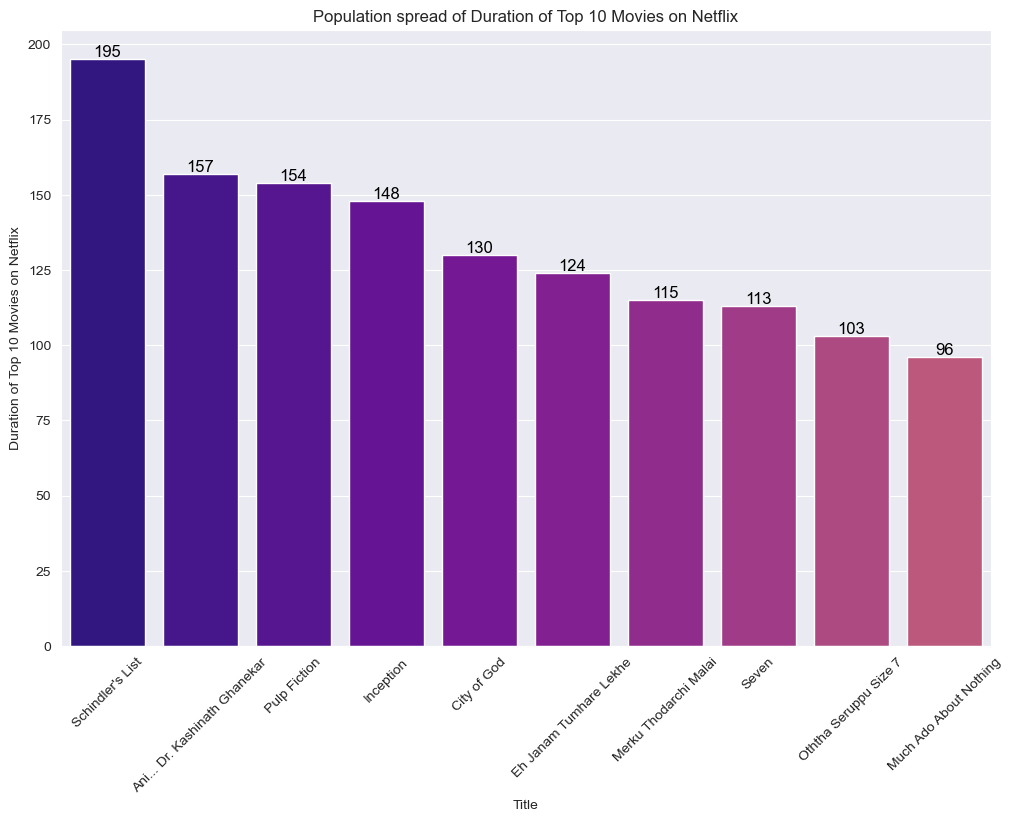

In [90]:
num_colors = len(top_10_movies)
colors = sb.color_palette("plasma", n_colors=num_colors)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sb.barplot(data = top_10_movies,x = 'Title',y = 'Duration', palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Title')
plt.ylabel('Duration of Top 10 Movies on Netflix')
plt.title('Population spread of Duration of Top 10 Movies on Netflix')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### We plot the Top 10 Movies according to their Age-Rating

In [91]:
top_10_movies_age_rating = top_10_movies.hvplot.scatter(x='Title', y='weighted_average_vote', by='Rating', title='Weighted Average Vote VS Age Rating', xlabel='Age Rating', ylabel='Rating', rot=45, width=900, height=400,size=100)

top_10_movies_age_rating

:NdOverlay   [Rating]
   :Scatter   [Title]   (weighted_average_vote)

> We notice that the two movies with the Highest User Scores from IMDB, 'Pulp Fiction' and 'Schindler's List', have an Age-Rating of R
<br>
>
> However, Inception, the Movie with the second-highest User Score, has a PG-13 Age Rating

In [92]:
scatter_movie_year = top_10_movies.hvplot.scatter(x='Release_Year', y='weighted_average_vote', by='Title', height=400, width=800, size = 150, title='User Rating VS Year',xlabel='Year', ylabel='User Rating', colorbar=True, cmap='Category20')
scatter_movie_year

:NdOverlay   [Title]
   :Scatter   [Release_Year]   (weighted_average_vote)

**TV Shows**

In [93]:
tv_show_ratings = pd.read_csv('imdb_tvshows.csv',sep=',')
tv_show_ratings = tv_show_ratings[['Title','Genres','Rating','Years']]
tv_show_ratings

,Title,Genres,Rating,Years
0,The Family Man,"Action, Comedy, Drama",8.8,2019–
1,Lucifer,"Crime, Drama, Fantasy",8.1,2016–
2,The Handmaid's Tale,"Drama, Sci-Fi, Thriller",8.4,2017–
3,StartUp,"Crime, Thriller",8.0,2016–2018
4,Game of Thrones,"Action, Adventure, Drama",9.3,2011–2019
...,...,...,...,...
2995,Panic,"Comedy, Drama",9.3,2017–
2996,Ryan Hansen Solves Crimes on Television,"Action, Comedy, Crime",7.2,2017–2019
2997,Doubt,Drama,5.6,2017
2998,Friends with Better Lives,Comedy,7.0,2014


In [94]:
combined_df_tv_shows = tv_shows.merge(tv_show_ratings, on='Title',how='inner')
combined_df_tv_shows = combined_df_tv_shows.drop(columns = ['Listed_In','Years'])
combined_df_tv_shows = combined_df_tv_shows.rename(columns = {'Rating_x' : 'Age Rating','Rating_y' : 'IMDB Rating'})

combined_df_tv_shows.drop_duplicates(subset=['Title','Release_Year','IMDB Rating'], inplace=True) # We drop all duplicates
combined_df_tv_shows.dropna() # We drop all NA Values

combined_df_tv_shows

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Age Rating,Duration,Description,Month,Genres,IMDB Rating
0,s5,TV Show,Kota Factory,Missing,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,September,"Comedy, Drama",9.2
1,s16,TV Show,Dear White People,Missing,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,Students of color navigate the daily slights a...,September,"Comedy, Drama",6.2
2,s26,TV Show,Love on the Spectrum,Missing,Brooke Satchwell,Australia,2021-09-21,2021,TV-14,2 Seasons,Finding love can be hard for anyone. For young...,September,"Documentary, Reality-TV, Romance",8.5
3,s33,TV Show,Sex Education,Missing,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,2021-09-17,2020,TV-MA,3 Seasons,Insecure Otis has all the answers when it come...,September,"Comedy, Drama",8.3
4,s41,TV Show,He-Man and the Masters of the Universe,Missing,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,2021-09-16,2021,TV-Y7,1 Season,Mighty teen Adam and his heroic squad of misfi...,September,"Adventure, Animation, Family",7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,s8645,TV Show,Twin Peaks,Missing,"Kyle MacLachlan, Michael Ontkean, Mädchen Amic...",United States,2017-07-01,1990,TV-14,2 Seasons,"""Who killed Laura Palmer?"" is the question on ...",July,"Crime, Drama, Fantasy",8.5
531,s8711,TV Show,Weeds,Missing,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,2014-04-01,2012,TV-MA,8 Seasons,A suburban mother starts selling marijuana to ...,April,"Comedy, Crime, Drama",7.9
532,s8727,TV Show,When Calls the Heart,Missing,"Erin Krakow, Daniel Lissing, Lori Loughlin, Ma...",United States,2018-12-29,2017,TV-PG,5 Seasons,"Leaving behind her upper-crust city roots, a w...",December,"Drama, Family, Romance",8.1
533,s8776,TV Show,Yeh Meri Family,Missing,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1 Season,"In the summer of 1998, middle child Harshu bal...",August,"Comedy, Drama, Family",9.1


## What are the Top 10 TV Shows on Netflix?

In [95]:
tv_shows_ratings_df = combined_df_tv_shows.sort_values(by='IMDB Rating',ascending=False) # Sorting

top_10_tv_shows = tv_shows_ratings_df[:10]

top_10_tv_show_ratings = top_10_tv_shows.hvplot.bar(x='Title',y='IMDB Rating', title = 'Top 10 TV Shows On Netflix, by IMDB Rating', width = 800, height=400, rot=45, ylim=(8.5, 9.5)) # Rotation of xticks labels done to improve readability

labels_tv_show_ratings = hv.Labels(top_10_tv_shows, kdims = ['Title','IMDB Rating'], vdims = 'IMDB Rating')

top_10_tv_show_ratings * labels_tv_show_ratings

:Overlay
   .Bars.I   :Bars   [Title]   (IMDB Rating)
   .Labels.I :Labels   [Title,IMDB Rating]   (IMDB Rating)

**We plot the same graph in Matplotlib, to show sequential color patterns**

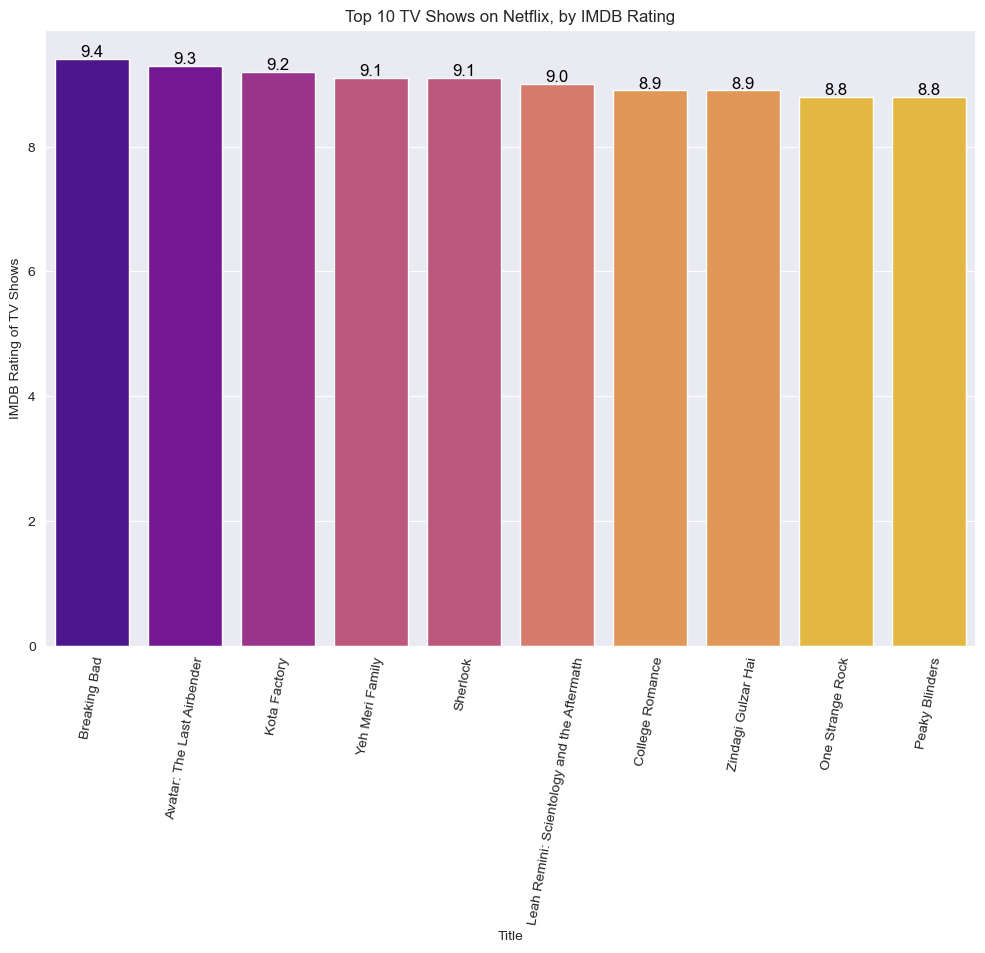

In [96]:
num_colors1 = len(top_10_tv_shows[:3]) # Till 9.1
num_colors2 = len(top_10_tv_shows[3:5]) # 9.1
num_colors3 = len(top_10_tv_shows[4:5]) # 9
num_colors4 = len(top_10_tv_shows[5:7]) # 8.9
num_colors5 = len(top_10_tv_shows[7:9])
num_colors = 7

colors = sb.color_palette("plasma", n_colors= num_colors)
colors1 = colors[:3]
colors2 = colors[3:4]
colors3 = colors[4:5]
colors4 = colors[5:6]
colors5 = colors[6:7]

colors = colors1 + (colors2*2) + colors3 + (colors4 * 2) + (colors5 * 2)

plt.figure(figsize=(12, 8))
ax = sb.barplot(data = top_10_tv_shows,x = 'Title',y = 'IMDB Rating', palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Title')
plt.ylabel('IMDB Rating of TV Shows')
plt.title('Top 10 TV Shows on Netflix, by IMDB Rating')

# Display the plot
plt.xticks(rotation=80) # Rotating labels to improve readability
plt.show()

In [97]:
top_10_tv_shows['Country'] # No cleaning required

442                    United States
178                    United States
0                              India
533                            India
511    United Kingdom, United States
124                    United States
255                            India
534                         Pakistan
491                    United States
251                   United Kingdom
Name: Country, dtype: object

In [98]:
temp = top_10_tv_shows[['Title','Country','IMDB Rating']]
tv_shows_10_countries = temp.hvplot.scatter(x='Country', y='Title', c='IMDB Rating', cmap='Category20', width=1800, height=400,size=100)
tv_shows_10_countries

:Scatter   [Country]   (Title,IMDB Rating)

> We note that a majority of the Top 10 TV Shows on Netflix are from the United States
<br>
>
>> However, in terms of the average IMDB Rating of TV Shows from the United States, the average IMDB Ratings for TV Shows from India are comparable, at 9.125 v.s. 9.067 respectively

In [99]:
country_top10_tv = top_10_tv_shows['Country'].value_counts().reset_index()

# Rename the columns for clarity
country_top10_tv.columns = ['Country', 'TV Show Count']

# Display the DataFrame
country_top10_tv

,Country,TV Show Count
0,United States,4
1,India,3
2,"United Kingdom, United States",1
3,Pakistan,1
4,United Kingdom,1


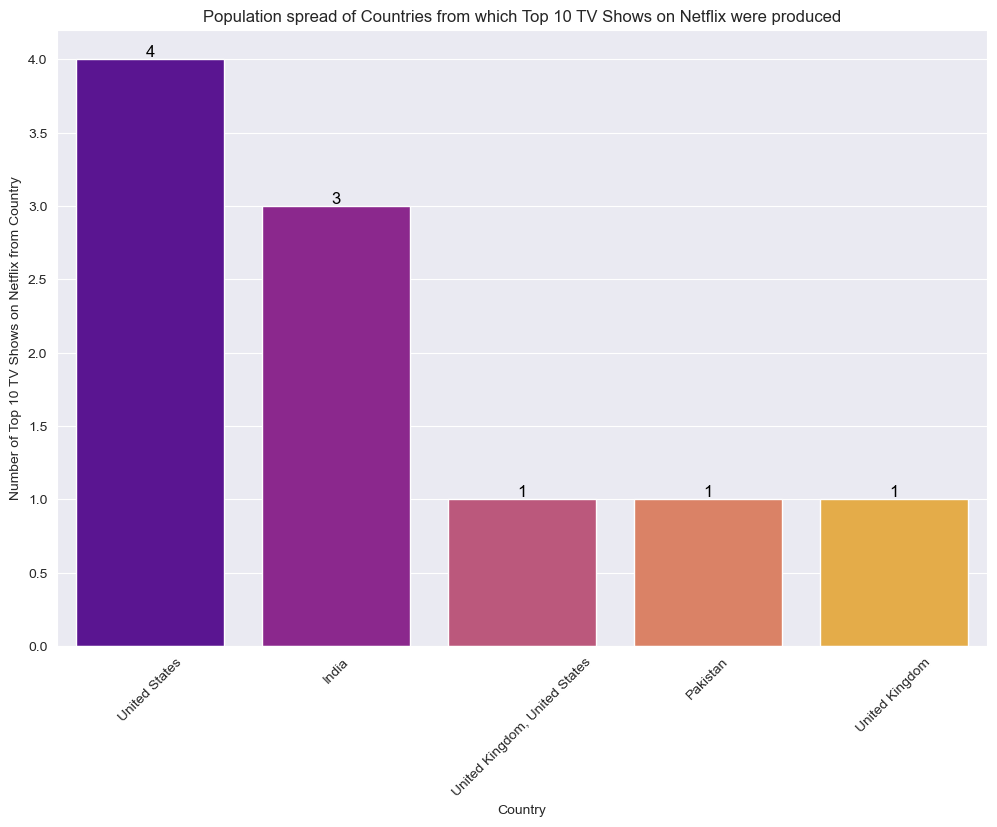

In [100]:
num_colors = len(country_top10_tv)
colors = sb.color_palette("plasma", n_colors=num_colors)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sb.barplot(data = country_top10_tv,x = 'Country',y = 'TV Show Count', palette=colors)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Top 10 TV Shows on Netflix from Country')
plt.title('Population spread of Countries from which Top 10 TV Shows on Netflix were produced')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

> We can surmise from the plot above that **4 Movies**, out of the Top 10 Movies on Netflix, are from the **United States**. Thus, the **United States** has produced the **most number of TV Shows from the Top 10** TV Shows on Netflix
<br>
>
> After the United States, **India** has produced **3 of the Top 10** Movies on Netflix. 
<br>
>
>> This is an interesting measure of **Quality over Quantity**. As we have discovered before, the **United States** has released the largest number of TV Shows on Netflix, at **2752 Movies**. Comparatievly, **India** has only released around 35% of the number of TV Shows released by the United States, on Netflix, at **962** Movies.
<br>
>>
>> Even though this is the case in the amount of Movies released, on average, **Indian movies in the top 10 have received higher ratings than those from the United States**. This implies that the quality of Movies released on Netflix from India are greater in quality, on average, than the United States

In [101]:
type(top_10_tv_shows['Genres'][442])

str

### Now, we perform Analysis on the Genres of the Top 10 TV Shows on Netflix

In [102]:
top_10_tv_shows['Genres'] = top_10_tv_shows['Genres'].str.split(', ')


top_10_tv_shows = top_10_tv_shows.explode('Genres')

top_10_tv_shows
plot_tv = top_10_tv_shows.hvplot.scatter(
    x='Genres',
    y='Title',
    by = 'IMDB Rating',
    xlabel='Genre',
    ylabel='Title',
    title='Top 10 TV Shows on Netflix, by Genre',
    rot=45,
    width=1000,
    height=400,
    size=200
)

# Display the plot
plot_tv

/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/275827778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_tv_shows['Genres'] = top_10_tv_shows['Genres'].str.split(', ')


:NdOverlay   [IMDB Rating]
   :Scatter   [Genres]   (Title)

> We note, from the Scatter Plot above, that a **majority** of the TV Shows belong to the **'Drama' genre**
<br>
>
>> The TV Shows belonging to this Drama Genre are; **'Breaking Bad'**, **'Kota Factory'**, **'Yeh Meri Family'**, **'Sherlock'**, **'College Romance'**, and **'Peaky Blinders'**
<br>
>>
> 7 of the Top 10 TV Shows are a Mix of Genres. The other 3 TV Shows of the Top 10 TV Shows belong to distinct genres. Namely, 'One Strange Rock' and 'Leah Remini : Scientology and the Aftermath' belong to the Documentary Genre, and 'Zindagi Gulzar Hai' belongs to the Romance Genre, 
<br>
>
> We note, from the Scatter Plot above, that the TV Shows which span the most genres, are 'Breaking Bad', 'Avatar : The Last Airbender', 'Sherlock', 'Yeh Meri Family', and 'College Romance'

**We plot the Average Votes for each TV Show against the Title of the TV Show and the Genre of the TV Show, using a Scatter Plot, for the Top 10 TV Shows in Netflix**

In [103]:
scatter_plot_tv_show = top_10_tv_shows.hvplot.scatter(x='Title', y='IMDB Rating', by='Genres', rot=45, width=900, height=400,size=100, title = "IMDB Rating VS Genre")
scatter_plot_tv_show

:NdOverlay   [Genres]
   :Scatter   [Title]   (IMDB Rating)

> **'Breaking Bad'** and **'Avatar : The Last Airbender'** have the Highest Votes among Users of IMDB, at **9.4**, and **9.3** respectively
<br>
>

### Now, we plot the Top 10 TV Shows according to their Duration

In [104]:
# Cleaning the Column Data
top_10_tv_shows['Duration'] = top_10_tv_shows['Duration'].str.extract('(\d+)').astype(int)
top_10_tv_shows = top_10_tv_shows.sort_values(by='Duration', ascending = False)

In [105]:
top_10_tv_shows_duration = top_10_tv_shows.hvplot.bar(x='Title',y='Duration',title='Top 10 TV Shows on Netflix by Duration',width=2000,height=400)

labels_tv_shows_duration = hv.Labels(top_10_tv_shows, kdims = ['Title','Duration'], vdims = 'Duration')


top_10_tv_shows_duration * labels_tv_shows_duration

:Overlay
   .Bars.I   :Bars   [Title]   (Duration)
   .Labels.I :Labels   [Title,Duration]   (Duration)

**We include a MatplotLib PLot below to show sequential colour pattern**

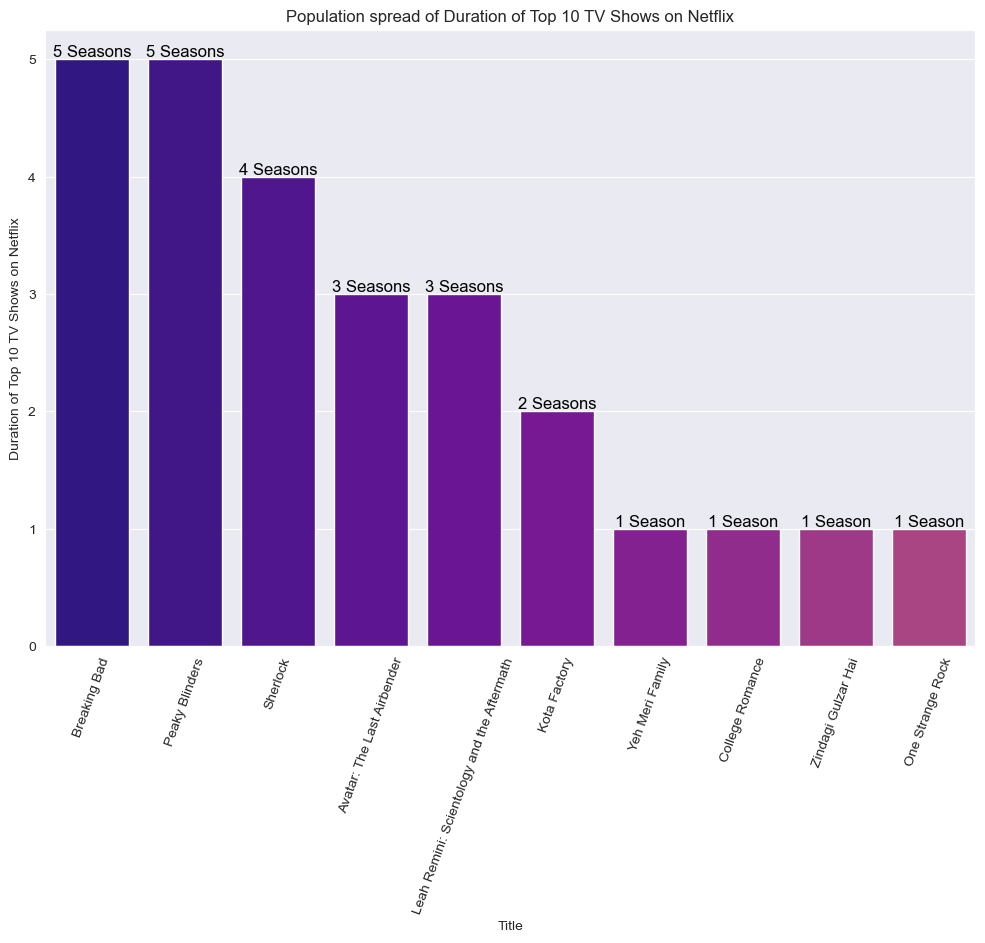

In [106]:
num_colors = len(top_10_tv_shows)
colors = sb.color_palette("plasma", n_colors=num_colors)

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sb.barplot(data = top_10_tv_shows,x = 'Title',y = 'Duration', palette=colors)

for p in ax.patches:
    if (int(p.get_height()) != 1):
        ax.annotate(f'{int(p.get_height())} Seasons', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    else:
        ax.annotate(f'{int(p.get_height())} Season', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Title')
plt.ylabel('Duration of Top 10 TV Shows on Netflix')
plt.title('Population spread of Duration of Top 10 TV Shows on Netflix')

# Display the plot
plt.xticks(rotation=70)  # Rotate x-axis labels if needed
plt.show()

> We can see that there is no direct link between the Popularity of a TV Show and the Duration of the TV Show, since Breaking Bad has the longest Duration and the highest IMDB Rating of 9.4, but Avatar : The Last Airbender has a significantly shorter Duration as compared to Breaking Bad, but still has the second-highest IMDB Rating of 9.3

### Now, we plot the Top 10 TV Shows according to their Age-Rating

In [107]:
top_10_tv_shows_age_rating = top_10_tv_shows.hvplot.scatter(x='Title', y='IMDB Rating', by='Age Rating', title='IMDB Rating VS Age Rating', xlabel='Age Rating', ylabel='Rating', rot=45, width=900, height=400,size=100)

top_10_tv_shows_age_rating

:NdOverlay   [Age Rating]
   :Scatter   [Title]   (IMDB Rating)

> We notice that the TV Show with the Highest User Score of 9.4, 'Breaking Bad', has an Age-Rating of R
<br>
>
> However, Avatar : The Last Airbender, the Tv Show with the second-highest User Score of 9.3, has a TV-Y7 Age Rating, meaning that it is cleared to watch for Children of the Age of 7 and older

### Now, we analyse the TV Shows based on the Year in which they were released

> The highest rated TV Show, Breaking Bad, was released **6 Years after** the second-highest rated TV Show, on 2013, Avatar : The Last Airbender was released, on 2007
<br>
>
> We notice that there is no general trend for the IMDB Ratings VS Year, since Sherlock got a relatively high rating when it was the latest to be released on Netflix, and Zindagi Gulzar Hai got the lowest rating, even when it was one of the earliest movies which were released.
<br>
>
>> However, we note that 2018 is the Year in which most of the Top 10 TV Shows were released

In [108]:
scatter_tv_shows_year = top_10_tv_shows.hvplot.scatter(x='Release_Year', y='IMDB Rating', by='Title', height=400, width=800, size = 150, title='User Rating VS Year',xlabel='Year', ylabel='User Rating', colorbar=True, cmap='Category20')
scatter_tv_shows_year 

:NdOverlay   [Title]
   :Scatter   [Release_Year]   (IMDB Rating)

# Dashboard Implementation


In [109]:
data_split = split_type * labels_split_type
data_split.opts(shared_axes = False)

overall_netflix_tab = pn.Column(
    "# Bird's Eye Analysis of all Media / Content on Netflix", 
    data_split,
    width=800
)

Movies Overall Data Below

In [110]:
country_movie = bar_plot_movies_country * movies_country_labels
country_movie.opts(width = 6000, height = 400, shared_axes = False)

:Overlay
   .Bars.I   :Bars   [Country]   (Count)
   .Labels.I :Labels   [Country,Count]   (Count)

In [111]:
yor_movie = bar_plot_movies_release * movies_release_labels
yor_movie.opts(shared_axes = False)

:Overlay
   .Bars.I   :Bars   [Release_Year]   (Count)
   .Labels.I :Labels   [Release_Year,Count]   (Count)

In [112]:
country_df['Country'] = country_df['Country'].str.replace(r'(?<=\w)([A-Z])', r' \1')

country_movie_dropdown = pn.widgets.Select(name="Country-Wise Breakdown", options=country_df['Country'].tolist(), value = country_df['Country'].iloc[0])

def update_plot(selected_category):
    # Filter the DataFrame based on the selected x-axis value
    filtered_data = movies[movies['Country'] == selected_category]
    
    filtered_data = filtered_data.groupby(['Country', 'Release_Year']).size().reset_index(name='Count')
    
    # Create a bar plot for the selected category
    bar = filtered_data.hvplot.bar(x='Release_Year', y='Count', title=f"Movies Released, per Year, by {selected_category}", width = 800, height = 500)
    labels = hv.Labels(data = filtered_data, kdims = ['Release_Year','Count'], vdims = 'Count')
    
    bar.opts(width = 800, height = 500, shared_axes = False, ylim = (0,300))
    
    return bar * labels

plot_movies_country_pane = pn.bind(update_plot, country_movie_dropdown)

/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/375358443.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  country_df['Country'] = country_df['Country'].str.replace(r'(?<=\w)([A-Z])', r' \1')


In [113]:
if heatmap_data_subset.index.name is not None:
    heatmap_data_subset.reset_index(inplace=True)
    
heatmap_data = pd.melt(heatmap_data_subset, id_vars=['Month'], var_name='Release_Year', value_name='Number of Movies Released')

heatmap_data['Month'] = pd.Categorical(heatmap_data['Month'], categories=month_order, ordered=True)

# Create the heatmap using hvplot
heatmap_movie = heatmap_data.hvplot.heatmap(x='Release_Year', y='Month', C='Number of Movies Released', cmap='coolwarm', colorbar=True, 
                                     title='Netflix Movies Release Schedule', clim=(0, heatmap_data['Number of Movies Released'].max()))

# Customize the plot
heatmap_movie.opts(xlabel='Year Movie Was Released', ylabel='Month', xticks=12, xrotation=45, width=800, height=400, shared_axes = False)

heatmap_pane_movie = pn.pane.HoloViews(heatmap_movie)

In [114]:
overall_movies_num_tab = pn.Column(
    "# Overall Analysis of the Number of Movies on Netflix", 
    pn.Row(country_movie),
    country_movie_dropdown,
    pn.Row(plot_movies_country_pane, heatmap_movie),
    pn.Row(yor_movie),
    pn.Row(change_num_years_movie),
    width = 800
)

In [115]:
overall_movies_duration = pn.Column(
    '# Overall Analysis of the Durations of Movies on Netflix',
    pn.Row(bar_plot_movies_dur * movies_dur_labels)
)

overall_movies_genre = pn.Column(
    '# Overall Analysis of the Genres of Movies on Netflix',
    pn.Row(genre_movies * genre_labels)
)

overall_movies_age = pn.Column(
    '# Overall Analysis of the Age Ratings of All Movies on Netflix',
    pn.Row(bar_plot_movies_age * movies_age_labels)
)

overall_movies_release = pn.Column(
    '# Overall Analysis of the Release Years of All Movies on Netflix',
    pn.Row(bar_plot_movies_release * movies_release_labels)
)

TV Data Below

In [116]:
yor_tv = bar_plot_tv_release * tv_release_labels
yor_tv.opts(shared_axes = False)

:Overlay
   .Bars.I   :Bars   [Release_Year]   (Count)
   .Labels.I :Labels   [Release_Year,Count]   (Count)

In [117]:
country_df_tv['Country'] = country_df_tv['Country'].str.replace(r'(?<=\w)([A-Z])', r' \1')

country_tv_dropdown = pn.widgets.Select(name="Country-Wise Breakdown", options=country_df_tv['Country'].tolist(), value = country_df_tv['Country'].iloc[0])

def update_plot(selected_category):
    # Filter the DataFrame based on the selected x-axis value
    filtered_data = tv_shows[tv_shows['Country'] == selected_category]
    
    filtered_data = filtered_data.groupby(['Country', 'Release_Year']).size().reset_index(name='Count')
    
    # Create a bar plot for the selected category
    bar = filtered_data.hvplot.bar(x='Release_Year', y='Count', title=f"TV Shows Released, per Year, by {selected_category}", width = 800, height = 500)
    labels = hv.Labels(data = filtered_data, kdims = ['Release_Year','Count'], vdims = 'Count')
    
    bar.opts(width = 800, height = 500, shared_axes = False, ylim = (0,300))
    
    return bar * labels

plot_tv_country_pane = pn.bind(update_plot, country_tv_dropdown)

/var/folders/dn/k7v46bxj2yl77ysf_2mvfygr0000gn/T/ipykernel_41997/227289959.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  country_df_tv['Country'] = country_df_tv['Country'].str.replace(r'(?<=\w)([A-Z])', r' \1')


In [118]:
if heatmap_data_subset_tv.index.name is not None:
    heatmap_data_subset_tv.reset_index(inplace=True)
    
heatmap_data = pd.melt(heatmap_data_subset_tv, id_vars=['Month'], var_name='Release_Year', value_name='Number of TV Shows Released')

heatmap_data['Month'] = pd.Categorical(heatmap_data['Month'], categories=month_order, ordered=True)

# Create the heatmap using hvplot
heatmap_tv = heatmap_data.hvplot.heatmap(x='Release_Year', y='Month', C='Number of TV Shows Released', cmap='coolwarm', colorbar=True, 
                                     title='Netflix Movies Release Schedule', clim=(0, heatmap_data['Number of TV Shows Released'].max()))

# Customize the plot
heatmap_tv.opts(xlabel='Year TV Show Was Released', ylabel='Month', xticks=12, xrotation=45, width=800, height=400, shared_axes = False)

heatmap_pane_tv = pn.pane.HoloViews(heatmap_tv)

In [119]:
container1 = bar_plot_tv_country = bar_plot_tv_country * movies_tv_labels
container1.opts(width = 6000, height = 400, shared_axes = False)

genre_tv = genre_tv.opts(shared_axes = False)
bar_plot_tv_age = bar_plot_tv_age.opts(shared_axes = False)
bar_plot_tv_release = bar_plot_tv_release.opts(shared_axes = False)


overall_tv_num_tab = pn.Column(
    "# Overall Analysis of the Number of TV Shows on Netflix", 
    pn.Row(container1),
    country_tv_dropdown,
    pn.Row(plot_tv_country_pane, heatmap_tv),
    pn.Row(yor_tv),
    pn.Row(change_num_years_tv),
    width = 800
)

overall_tv_duration = pn.Column(
    '# Overall Analysis of the Durations of TV Shows on Netflix',
    pn.Row(bar_plot_tv_dur * tv_dur_labels)
)

overall_tv_genre = pn.Column(
    '# Overall Analysis of the Genres of TV Shows on Netflix',
    pn.Row(genre_tv * genre_labels_tv)
)

overall_tv_age = pn.Column(
    '# Overall Analysis of the Age Ratings of TV Shows on Netflix',
    pn.Row(bar_plot_tv_age * tv_age_labels)
)

overall_tv_release = pn.Column(
    '# Overall Analysis of the Release Years of TV Shows on Netflix',
    pn.Row(bar_plot_tv_release * tv_release_labels)
)

In [120]:
sub_movie_overall_tabs = pn.Tabs(
    ("Country of Origin of Movies", overall_movies_num_tab),
    ("Durations of Movies",overall_movies_duration),
    ("Genres of Movies", overall_movies_genre),
    ("Age Ratings for Movies", overall_movies_age),
    ("Release Years for Movies", overall_movies_release) # Include movies released per year
)

In [121]:
sub_tv_overall_tabs = pn.Tabs(
    ("Number of TV Shows", overall_tv_num_tab),
    ("Durations of TV Shows",overall_tv_duration),
    ("Genres of TV Shows", overall_tv_genre),
    ("Age Ratings for TV Shows", overall_tv_age),
    ("Release Years for TV Shows", overall_tv_release) # Include TV Shows released per year
)

In [122]:
temp = top_10_movies[['Title','Country','weighted_average_vote']]
movies_10_countries = temp.hvplot.scatter(x='Country', y='Title', c='weighted_average_vote', width=1800, height=400,size=100)

top10_movies_score = pn.Column(
    "# Analysis of User Score for Top 10 Movies on Netflix", 
    pn.Row(top_10_movie_ratings * labels_movieratings),
    width = 800
)


top_10_movies_countries = pn.Column(
    "# Analysis of Countries of Origin for Top 10 Movies on Netflix", 
    pn.Row(movies_10_countries),
    width = 800
)


top_10_movies_dur = pn.Column(
    "# Analysis of Durations for Top 10 Movies on Netflix", 
    pn.Row(top_10_movies_duration * top_10_movies_dur_labels),
    width = 800
)

top_10_movies_genre = pn.Column(
    "# Analysis of Genres for Top 10 Movies on Netflix", 
    pn.Row(plot_movies),
    width = 800
)

top_10_movies_age = pn.Column(
    "# Analysis of Age Ratings Against User Score for Top 10 Movies on Netflix", 
    pn.Row(top_10_movie_age_rating),
    width = 800
)

top_10_movies_rating_month = pn.Column(
    "# Analysis of User Score Against Year of Release for Top 10 Movies on Netflix", 
    pn.Row(scatter_movie_year),
    width = 800
)

In [123]:
sub_movie_top10_tabs = pn.Tabs(
    ("User Score", top10_movies_score),
    ("Countries",top_10_movies_countries),
    ("Duration", top_10_movies_dur),
    ("Genres", top_10_movies_genre),
    ("Age-Rating VS User Score", top_10_movies_age),
    ("User Score VS Year of Release",top_10_movies_rating_month)
)

In [124]:
top10_tv_score = pn.Column(
    "# Analysis of User Score for Top 10 TV Shows on Netflix", 
    pn.Row(top_10_tv_show_ratings * labels_tv_show_ratings),
    width = 800
)


top_10_tv_countries = pn.Column(
    "# Analysis of Countries of Origin for Top 10 TV Shows on Netflix", 
    pn.Row(tv_shows_10_countries),
    width = 800
)


top_10_tv_dur = pn.Column(
    "# Analysis of Durations for Top 10 TV Shows on Netflix", 
    pn.Row(top_10_tv_shows_duration * labels_tv_shows_duration),
    width = 800
)

top_10_tv_genre = pn.Column(
    "# Analysis of Genres for Top 10 TV Shows on Netflix", 
    pn.Row(plot_tv),
    width = 800
)

top_10_tv_age = pn.Column(
    "# Analysis of Age Ratings Against User Score for Top 10 TV Shows on Netflix", 
    pn.Row(top_10_tv_shows_age_rating),
    width = 800
)

top_10_tv_rating_month = pn.Column(
    "# Analysis of User Score Against Year of Release for Top 10 TV Shows on Netflix", 
    pn.Row(scatter_tv_shows_year),
    width = 800
)

In [125]:
sub_tv_top10_tabs = pn.Tabs(
    ("User Score", top10_tv_score),
    ("Countries",top_10_tv_countries),
    ("Duration", top_10_tv_dur),
    ("Genres", top_10_tv_genre),
    ("Age-Rating VS User Score", top_10_tv_age),
    ("User Score VS Year of Release",top_10_tv_rating_month)
)

In [126]:
main_tabs = pn.Tabs(
    ("Netflix Data : Basic Information", overall_netflix_tab),
    ("Movies : Overall Analysis", sub_movie_overall_tabs),
    ("TV Shows : Overall Analysis", sub_tv_overall_tabs),
    ("Movies : In-Depth Analysis - Top 10", sub_movie_top10_tabs),
    ("TV Shows : In-Depth Analysis - Top 10", sub_tv_top10_tabs),
)


main_dashboard = pn.Column(
    f'# Dashboard for Netflix Data',
    main_tabs
)

dashboard_app = pn.serve(main_dashboard) # Opens the Dashboard in a localhost server for Interactivity

Launching server at http://localhost:61175
